# Image Preprocessing**

In [ ]:
# image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30
base_dir = 'C:\\Users\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png'

training_set = train_datagen.flow_from_directory(base_dir+'\\Train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode="categorical")

valid_set = valid_datagen.flow_from_directory(base_dir+'\\Validation',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')
#  class_mode='categorical'
#  class_mode=sparse for OCR

# Hyperparameter tuning for AlexNet Architecture

# Hyperparameter Tuning


In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np

np.random.seed(12345)
logits = tf.convert_to_tensor(np.random.sample((4,4)))
def modified_alexnet(hp):
    alexnet = Sequential()
   
  # filter size from 96-256
    alexnet.add(Convolution2D(filters = 96,
                                      kernel_size=11, strides=4, activation='relu'))
    alexnet.add(MaxPooling2D(pool_size=3, strides=2))
  # filter size from 256-512
    alexnet.add(Convolution2D(filters = 256,
                                      kernel_size=5, padding='same', activation='relu'))
    alexnet.add(MaxPooling2D(pool_size=3, strides=2))
  # filter size from 384-512
    alexnet.add(Convolution2D(filters = 384,
                                      kernel_size=3, padding='same', activation='relu'))
  # filter size from 384-512
    alexnet.add(Convolution2D(filters = 384,
                                      kernel_size=3, padding='same', activation='relu'))
   # filter size from 256-512
    alexnet.add(Convolution2D(filters = 256,
                                      kernel_size=3, padding='same', activation='relu'))
  
    alexnet.add(MaxPooling2D(pool_size=3, strides=2))
    alexnet.add(Flatten())
  # dense unit from 4096 to 8192
    alexnet.add(Dense(units =4096,activation='relu'))
  # dropout value from 0-0.5
    alexnet.add(Dropout(hp.Float('dropout_1', 0, 0.5, step=0.1, default=0.5)))
                
    alexnet.add(Dense(units = 4096,activation='relu'))
  # dropout value from 0-0.5
    alexnet.add(Dropout(hp.Float('dropout_2', 0, 0.5, step=0.1, default=0.5)))
    
#     alexnet.add(Dense(units = 4096,activation='relu'))
#   # dropout value from 0-0.5
#     alexnet.add(Dropout(hp.Float('dropout_3', 0, 0.5, step=0.1, default=0.5)))
    alexnet.add(Dense(10, activation='softmax'))
                
  # choice for the learning rate, i.e 0.01, 0.001, 0.0001 
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    batch_size=hp.Choice("batch_size", values=[16,32,64])
#     batch_size=hp.Choice("batch_size", values=[100, 128, 150, 200, 250,256,512, 1024])
    epoch=hp.Choice("epoch", values=[10,20,30,40])
#     wrong_labels = tf.convert_to_tensor(np.array([[0,0,1,0], [0,0,1,0], [1,0,0,0],[0,1,0,0]]))
#     loss_2 = tf.compat.v1.losses.sparse_softmax_cross_entropy(wrong_labels, logits)
#     loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
#      loss='sparse_categorical_crossentropy'
    alexnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss='categorical_crossentropy',
                metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

    return alexnet

# Keras Tuner

In [ ]:
import kerastuner as kt
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
tuner_search=RandomSearch(modified_alexnet,
                          objective='val_accuracy',
                          max_trials=4, 
                          directory = 'C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_LZL Tuning',
                          project_name='params 22/11/2021.h5')

# tuner_search.results_summary()
# tuner = kt.Hyperband(modified_alexnet,
#                      objective = 'val_accuracy', 
#                      max_epochs = 10,
#                      factor = 3,
#                      directory = 'C:\\Users\\user\\Desktop\\AlexNet_Coding',
#                       distribution_strategy=tf.distribute.OneDeviceStrategy(device_name),
#                      project_name ='AlexNet_LZL Tuning')  

In [ ]:
import numpy as np
# x=np.array(training_set)
# y=np.array(valid_set)
tuner_search.search_space_summary()
tuner_search.search(training_set, epochs = 1,validation_data=valid_set)

# tuner_search.search(training_set,
#                          epochs=3,
#                          validation_data=valid_set,
#                     steps_per_epoch=2
#                        )

tuner_search.results_summary()



# Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [ ]:
tuner_search.results_summary()

# AlexNet Architecture

In [1]:
# image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64
base_dir = "C:\\Users\\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png"

training_set = train_datagen.flow_from_directory(base_dir+'\\Train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode="sparse")

valid_set = valid_datagen.flow_from_directory(base_dir+'\\Validation',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='sparse')
#  class_mode='categorical'
#  class_mode=sparse for OCR

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [2]:
# # image preprocessing
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1./255,
# #                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    fill_mode='nearest')

# valid_datagen = ImageDataGenerator(rescale=1./255)

# batch_size = 64
# base_dir = "C:\\Users\\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png"

# training_set = train_datagen.flow_from_directory(base_dir+'\\Train',
#                                                  target_size=(224, 224),
#                                                  batch_size=batch_size,
#                                                  class_mode="categorical")

# valid_set = valid_datagen.flow_from_directory(base_dir+'\\Validation',
#                                             target_size=(224, 224),
#                                             batch_size=batch_size,
#                                             class_mode='categorical')
# #  class_mode='categorical'
# #  class_mode=sparse for OCR

In [3]:
import os
from sklearn.model_selection import train_test_split

image_directory="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png\\Validation"
image_directory2="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png\\Train"
y= os.listdir(image_directory)
x= os.listdir(image_directory2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


# Trial for hyperparameters

In [4]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Convolution2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import BatchNormalization
# # from tensorflow.keras.layers import AveragePooling2D
# # from tensorflow.keras.layers import Embedding
# from tensorflow.keras import optimizers

# classifier = Sequential()

# classifier.add(tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", 
#                                                                    input_shape=(224,224,3)))

# classifier.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(tf.keras.layers.MaxPooling2D(3, strides=2))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Conv2D(256, 11, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(BatchNormalization())

# # classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# classifier.add(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same'))
# classifier.add(tf.keras.layers.Activation('relu'))



# classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
# classifier.add(BatchNormalization())


# classifier.add(tf.keras.layers.Flatten())
# classifier.add(tf.keras.layers.Dense(4096, activation='relu'))
# classifier.add(tf.keras.layers.Dropout(0.2))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Dense(4096, activation='relu'))
# classifier.add(tf.keras.layers.Dropout(0.5))
# classifier.add(BatchNormalization())

# # classifier.add(Dense(units = 1000, activation = 'relu'))
# # classifier.add(Dropout(0.4))   
# # classifier.add(BatchNormalization())

# # classifier.add(tf.keras.layers.Flatten())
# # classifier.add(tf.keras.layers.AveragePooling2D())
# classifier.add(tf.keras.layers.Dense(10, activation='softmax'))
# classifier.summary()

# original architecture 

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers

classifier = Sequential()

classifier.add(tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", 
                                                                   input_shape=(224,224,3)))

classifier.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
classifier.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
classifier.add(tf.keras.layers.Activation('relu'))
classifier.add(tf.keras.layers.MaxPooling2D(3, strides=2))
classifier.add(BatchNormalization())

classifier.add(tf.keras.layers.Conv2D(256, 11, strides=4, padding='same'))
classifier.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
classifier.add(tf.keras.layers.Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

classifier.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
classifier.add(tf.keras.layers.Activation('relu'))
classifier.add(BatchNormalization())

classifier.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
classifier.add(tf.keras.layers.Activation('relu'))
classifier.add(BatchNormalization())

# classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
classifier.add(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same'))
classifier.add(tf.keras.layers.Activation('relu'))



classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
classifier.add(BatchNormalization())


classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(4096, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(BatchNormalization())

classifier.add(tf.keras.layers.Dense(4096, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(BatchNormalization())

# classifier.add(Dense(units = 1000, activation = 'relu'))
# classifier.add(Dropout(0.4))   
# classifier.add(BatchNormalization())

classifier.add(tf.keras.layers.Dense(38, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                          

# ALEX NET ARCHITECTURE WITH WEIGHT

In [6]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Convolution2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras import optimizers

# classifier = Sequential()

# classifier.add(tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", 
#                                                                    input_shape=(224,224,3)))

# classifier.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(tf.keras.layers.MaxPooling2D(3, strides=2))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Conv2D(256,11, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(MaxPooling2D(pool_size = (3,3), strides = (2, 2), padding='valid'))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Activation('relu'))
# classifier.add(BatchNormalization())

# # classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# classifier.add(tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'))
# classifier.add(tf.keras.layers.Activation('relu'))

# # comment

# classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))   
# classifier.add(BatchNormalization())


# classifier.add(tf.keras.layers.Flatten())
# classifier.add(tf.keras.layers.Dense(4096, activation='relu'))
# classifier.add(tf.keras.layers.Dropout(0.5))
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Dense(4096, activation='relu'))
# classifier.add(tf.keras.layers.Dropout(0.5))
# classifier.add(BatchNormalization())

# # comment
# classifier.add(Dense(units = 1000, activation = 'relu'))
# classifier.add(Dropout(0.0))   
# classifier.add(BatchNormalization())

# classifier.add(tf.keras.layers.Dense(10, activation='softmax'))
# classifier.summary()

# Weight Loading

In [7]:
# import numpy as np



# weights = np.load("C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\bvlc_alexnet.npy")


# with h5py.File('C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\AlexNetWeightConvert.h5', 'w') as hf:
#     h5.create_dataset('C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\AlexNetWeightConvert.h5', data=weights)


# # model.load_weights('weights_data.h5')

In [8]:
# import Model as Model

# model1 = Model.from_caffe_model(conn=sess, 
#                           input_network_file='C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\deploy.prototxt', 
#                            output_model_table='alexnet', 
#                            model_weights_file='C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\bvlc_alexnet.caffemodel')

In [9]:
# from tensorflow.keras import backend as K 
# K.clear_session()
# classifier.load_weights('C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\AlexNetModel.hdf5')
# # # K.clear_session()

# Freezing layer

In [10]:
# # let's visualize layer names and layer indices to see how many layers
# # we should freeze:
# from tensorflow.keras import layers
# for i, layer in enumerate(classifier.layers):
#     print(i, layer.name)

In [11]:
# # we chose to train the top 2 conv blocks, i.e. we will freeze
# # the first 8 layers and unfreeze the rest:
# print("Freezed layers:")
# for i, layer in enumerate(classifier.layers[:5]):
#     print(i, layer.name)
#     layer.trainable = False

# Compile Layer

In [12]:
# Compiling the Model
from tensorflow.keras import optimizers

classifier.compile(optimizer="adam",loss='sparse_categorical_crossentropy',
               metrics=["accuracy"])


In [13]:
# # Compiling the Model
# from tensorflow.keras import optimizers
# from tensorflow import keras as keras
# from tensorflow.keras import metrics
# from tensorflow.keras.metrics import Precision, Recall
# # from keras import backend as K
# # import tensorflow as tf

# # training_set = tf.one_hot(training_set, depth=len(valid_set))
# # METRICS = [
# #   keras.metrics.TruePositives(name='tp'),
# #   keras.metrics.FalsePositives(name='fp'),
# #   keras.metrics.TrueNegatives(name='tn'),
# #   keras.metrics.FalseNegatives(name='fn'), 
# #   keras.metrics.Precision(name='precision'),
# #   keras.metrics.Recall(name='recall'),
# #   keras.metrics.CategoricalAccuracy(name='acc'),
# #   keras.metrics.AUC(name='auc'),
# # ]


# # def recall_m(valid_set, prediction):
# #     true_positives = K.sum(K.round(K.clip(valid_set*prediction, 0, 1)))
# #     possible_positives = K.sum(K.round(K.clip(valid_set, 0, 1)))
# #     recall = true_positives / (possible_positives + K.epsilon())
# #     return recall

# # def precision_m(valid_set, prediction):
# #     true_positives = K.sum(K.round(K.clip(valid_set*prediction, 0, 1)))
# #     predicted_positives = K.sum(K.round(K.clip(valid_set, 0, 1)))
# #     precision = true_positives / (predicted_positives + K.epsilon())
# #     return precision

# # def f1_m(valid_set, prediction):
# #     precision = precision_m(valid_set, prediction)
# #     recall = recall_m(valid_set, prediction)
# #     return 2*((precision*recall)/(precision+recall+K.epsilon()))




# classifier.compile(optimizer="adam",loss='categorical_crossentropy',
#                metrics= ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# # classifier.compile(optimizer="adam",loss='binary_crossentropy',
# #                metrics=["accuracy",tf.keras.metrics.Precision,metrics.Recall()])


# Model Training

In [14]:
# image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=8, 
                                   width_shift_range=0.08, 
                                   shear_range=0.3,
                                    height_shift_range=0.08, 
                                   zoom_range=0.08, 
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30
base_dir = 'C:\\Users\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png'

training_set = train_datagen.flow_from_directory(base_dir+'\\Train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode="sparse")

valid_set = valid_datagen.flow_from_directory(base_dir+'\\Validation',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='sparse')
#  class_mode='categorical'
#  class_mode=sparse for OCR

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [15]:
class_dict = training_set.class_indices
print(class_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [16]:
li = list(class_dict.keys())
print(li)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [17]:
train_num = training_set.samples
print(train_num)
valid_num = valid_set.samples
print(valid_num)

60000
10000


# TRAINING OF MODEL

In [18]:
# # checkpoint
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras import backend as K 
# import tensorflowjs as tfjs
# from tensorflow.keras.models import load_model



# # weightpath = "C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\best_weights_9.hdf5"
# weightpath='C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\AlexNet_Train_13.8.h5'
# checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True,
#                              save_weights_only=True, mode='max')
# callbacks_list = [checkpoint]

# batch_size=64
# # K.clear_session()
# #fitting images to CNN


# # filepath='C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\AlexNet_NoWeights_ep=2.h5'

# # classifier=load_model(filepath)

# # classifier.load_weights(filepath)
# # metrics = Metrics()
# history = classifier.fit_generator(training_set,
#                          steps_per_epoch=train_num//batch_size,
#                          validation_data=valid_set,
#                          epochs=1,
#                          validation_steps=valid_num//batch_size,
#                          callbacks=callbacks_list)
# # epochs=5 27/7/2021  + currently until 1845pm
# # saving model


# # classifier.save(filepath) 


# file='C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\FOR_VIVA_NoPrecision.h5'
# classifier.save_weights(file) 
# # tfjs.converters.save_keras_model(classifier,filepath)



# # val_acc_per_epoch = history.history['val_accuracy']
# # best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
# # print('Best epoch: %d' % (best_epoch,))




# Load WEIGHT TO model


In [19]:
# checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K 
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model
# weightpath = "C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\best_weights_9.hdf5"
# checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True,
#                              save_weights_only=True, mode='max')
# callbacks_list = [checkpoint]

# # batch_size=128
# # K.clear_session()
# #fitting images to CNN


filepath="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\BEST_AlexNet_KL_Train_NoWeights ep=2 acc=92_16.8.h5"



# filepath="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\AlexNet_weights\\BEST_AlexNet_KL_Train_NoWeights ep=2 acc=92_16.8.h5"
classifier.load_weights(filepath)

# DISPLAY GRAHPH

In [20]:
# #plotting training values
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)

# #accuracy plot
# plt.plot(epochs, acc, color='green', label='Training Accuracy')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='pink', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [21]:
import cv2
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# plt.xlim( 0,10)

def denoise(image):
#     # Resizing
#     img_lp = cv2.resize(image, (333, 75))
    
    # Apply gray scale
    img_gray_lp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     plt.imshow(img_gray_lp)
    
    
#     bfilter = cv2.bilateralFilter(img_gray_lp, 11, 17, 17) #Noise reduction
#     edged = cv2.Canny(bfilter, 30, 200) #Edge detection
#     plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    
#     keypoints,new= cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#     # contours = imutils.grab_contours(keypoints)
#     image_copy=image.copy()
#     _a= cv2.drawContours(image_copy, keypoints,-1, (255,0,255),2)

#     plt.imshow(image_copy)

#     contours = sorted(keypoints, key=cv2.contourArea, reverse=True)[:2]
#     plt.imshow(image_copy)
    
    
#     location = None
#     for contour in contours:
#         approx = cv2.approxPolyDP(contour, 10, True)
#         if len(approx) == 4:
#             location = approx
#         break
    
    
#     mask = np.zeros(img_gray_lp.shape, np.uint8)
#     new_image = cv2.drawContours(mask, [location], 0,255, -1)
#     new_image = cv2.bitwise_and(image, image, mask=mask)
#     plt.imshow(new_image)
    
    
    
    
    
    # Convert to binary image
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
#     Erode unwanted pixels
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    
#     # Dilate unwanted pixels
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    
    
    #COMMENT!!!!!!!!     
    img_binary_lp= cv2.bitwise_not(img_binary_lp)
    # Visual display of binary image
    plt.imshow(img_binary_lp, cmap='gray')
    ax = plt.axes()
    ax.set_xlabel('Width ',fontsize=20)
    ax.set_ylabel('Height ',fontsize=20)
    ax.xaxis.label.set_color('brown')       
    ax.yaxis.label.set_color('brown')
    ax.spines['bottom'].set_color('yellow')
    ax.spines['top'].set_color('red')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('blue')
    ax.tick_params(axis='x', colors='brown')    
    ax.tick_params(axis='y', colors='brown')
    plt.show()
    
    return img_binary_lp

# image = cv2.imread("C:\\Users\\HP\\Desktop\\AlexNet_Coding\\sample image\\s11.png")
# n=denoise(image)

In [22]:

def cropForContour(path,folder):
    if(path==None or folder==None):
        return "End of process"

    truth=True
    image=cv2.imread(path)
    
    
    plt.title("Please LEAVE some space MINIMUM 10 piexels for cropping for top left  and bottom right vertexes ",fontsize = 50)
    plt.show()
    
    
    plt.imshow(image)
    plt.show()
    
    while(truth):
            try:

                x1=input("enter the x of 1st coordinate(top left vertex ) to crop the image=")
                y1=input("enter the y of 1st coordinate(top left vertex ) to crop the image=")
                x2=input("enter the  x of 2nd coordinate (bottom right vertex ) to crop the image=")
                y2=input("enter the  y of 2nd coordinate (bottom right vertex ) to crop the image=")
                x1=int(x1)
                y1=int(y1)
                x2=int(x2)
                y2=int(y2)
                truth=False

                if(x1<0 or x2<0 or y1<0 or y2<0):
                    print("only non zero is accepted")
                    truth=True



            except:

                print("Invalid input detected")
                truth=True



    img = Image.open(path) 

    img = img.crop((x1,y1,x2,y2))
    img.save(folder+'\\Test_gray.jpg')
    #     img.show()
    image=cv2.imread(folder+'\\Test_gray.jpg')
    address=folder+'\\Test_gray.jpg'
    #     cv2.imshow("image",image)
    #     cv2.waitKey(0)
    plt.imshow(image)
    plt.show()
        
    return address

In [23]:
import numpy
def images_to_array(dataset_dir, image_size):
    dataset_array = []
    dataset_labels = []

    class_counter = 0

    classes_names = os.listdir(dataset_dir)
    for current_class_name in classes_names:
        class_dir = os.path.join(dataset_dir, current_class_name)
        images_in_class = os.listdir(class_dir)

#         print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

        for image_file in images_in_class:
            if image_file.endswith(".jpg"):
                image_file_dir = os.path.join(class_dir, image_file)

                img = keras.preprocessing.image.load_img(image_file_dir, target_size=(image_size, image_size))
                img_array = keras.preprocessing.image.img_to_array(img)

                img_array = img_array/255.0

                dataset_array.append(img_array)
                dataset_labels.append(class_counter)
        class_counter = class_counter + 1
    dataset_array = numpy.array(dataset_array)
    dataset_labels = numpy.array(dataset_labels)
    return dataset_array, dataset_labels

In [24]:
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score

def accuracyF(digit):
    
#     tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
#     fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
#     fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
#     print(tp)
#     acc= (tn+tp)/(tp+fp+tn+fn)
    print(digit)
    digit_list=[]
#     digit=[]
    truth=True
    while(truth):
        
    
        
        try:
         
            var=int(input("Please key in the digits on the images"))
            digit_string = str(var)


            digit_map = map(int, digit_string)

            digit_list = list(digit_map)
            print(digit_list)
            truth=False
            
        except:
            print("Invalid Digits")
            truth=True
    
    print(len(digit))
    num=[0]*len(digit)
    num_list=[0]*len(digit_list)
    accList=[None]*len(digit)
    
    i=0
    print(len(digit))
    k=len(digit)
    h=len(digit_list)
    print(k)
    found=[0]*len(digit_list)
    while(i<k):
#         print(len(digit_list))
        if(digit[i]!=' '):
            
            num[i]=int(digit[i])
#             print(num[i])
        
        i+=1
    
    for p in range(h):
            num_list[p]=int(digit_list[p])
#             print(num_list[p])
    
    m=0
    for p in range(h):
        
            if (num_list[p] in num):
                    
                    found[m]=num_list[p]
                    print(found)
                    m+=1
                    
            else:
                    found[m]=0 
                    m+=1
                
            
    acc=accuracy_score(found, num_list)
    acc=str(acc*100)
    print("accuracy for the predicted output and orginal image="+acc+"%")    
        
#     i=0
#     while(i<k):
#         var=num[i]
#         print("predicted digit=",var)
#         var2=num_list[i]
#         print("Original digit=",var2)
        
#         y_pred_pos = K.round(K.clip(var, 0, 1))
#         y_pred_neg = 1 - y_pred_pos

#         y_pos = K.round(K.clip(var2, 0, 1))
#         y_neg = 1 - y_pos

#         tp = K.sum(y_pos * y_pred_pos)
#         tn = K.sum(y_neg * y_pred_neg)

#         fp = K.sum(y_neg * y_pred_pos)
#         fn = K.sum(y_pos * y_pred_neg)
# #         print("tp=",tp)
#         numerator = (tp + tn )
# #         print("numerator=",numerator)
#         denominator = (tp+fp+tn+fn)
# #         print("denominator=",denominator)
# #         acc[0]=0
#         acc= numerator / (denominator) 
# #         acc= numerator / (denominator + K.epsilon()) 
#           acc=accuracy_score(found, num_list)
#           acc=str(acc*100)
#           print("accuracy for the predicted output and orginal image="+acc+"%")
# #         accList.append(acc)
#         print(accList[i])
#         i+=1
#         acc[i=acc[i]+acc[i+1]
#         print("accuracy=",acc)
#         i+=1
    
    
    
    


In [25]:
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score

def accuracyForCrop(digit):
    
#     tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
#     fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
#     fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
#     print(tp)
#     acc= (tn+tp)/(tp+fp+tn+fn)
    print(digit)
    digit_list=[]
#     digit=[]
    truth=True
    while(truth):
        
    
        
        try:
         
            var=int(input("Please key in the digits on the images"))
            digit_string = str(var)


            digit_map = map(int, digit_string)

            digit_list = list(digit_map)
            print(digit_list)
            truth=False
            
        except:
            print("Invalid Digits")
            truth=True
    
    print(len(digit))
    num=[0]*len(digit)
    num_list=[0]*len(digit_list)
    accList=[None]*len(digit)
    
    i=0
    print(len(digit))
    k=len(digit)
    h=len(digit_list)
    print(k)
    found=[0]*len(digit_list)
    while(i<k):
#         print(len(digit_list))
        if(digit[i]!=' '):
            
            num[i]=int(digit[i])
            print(num[i])
        
        i+=1
    
    for p in range(h):
            num_list[p]=int(digit_list[p])
            print(num_list[p])
    
#     m=0
#     for p in range(h):
        
#             if (num_list[p] in num):
                    
#                     found[m]=num_list[p]
#                     print(found)
#                     m+=1
                    
         
                
            
    acc=accuracy_score(num, num_list)
    acc=str(acc*100)
    print("accuracy for the predicted output and orginal image="+acc+"%")    
        
#     i=0
#     while(i<1):
#         var=num[i]
#         print("predicted digit=",var)
#         var2=num_list[i]
#         print("Original digit=",var2)
        
#         y_pred_pos = K.round(K.clip(var, 0, 1))
#         y_pred_neg = 1 - y_pred_pos

#         y_pos = K.round(K.clip(var2, 0, 1))
#         y_neg = 1 - y_pos

#         tp = K.sum(y_pos * y_pred_pos)
#         tn = K.sum(y_neg * y_pred_neg)

#         fp = K.sum(y_neg * y_pred_pos)
#         fn = K.sum(y_pos * y_pred_neg)
# #         print("tp=",tp)
#         numerator = (tp + tn )
# #         print("numerator=",numerator)
#         denominator = (tp+fp+tn+fn)
# #         print("denominator=",denominator)
# #         acc[0]=0
#         acc= numerator / (denominator) 
# #         acc= numerator / (denominator + K.epsilon()) 
#           acc=accuracy_score(found, num_list)
#           acc=str(acc*100)
#           print("accuracy for the predicted output and orginal image="+acc+"%")
# #         accList.append(acc)
#         print(accList[i])
#         i+=1
#         acc[i=acc[i]+acc[i+1]
#         print("accuracy=",acc)
#         i+=1
    
    
    
    


In [26]:
import numpy as np
import cv2
from sklearn.metrics import accuracy_score
import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

def ctr_img(i,path,valid_set):
    if(path==None ):
        return "End of process"
    q=1
    k=1
    digit=[]
#     acc=eva(y_test)
#     acc=int(acc)
    while(k<i):
        
            image_name= "\\output_shape_number_" + str(k) + ".jpg"
            img_ctr= cv2.imread(path+image_name)
            print(path+image_name)
            print(i)
            
           
            img_ctr=cv2.resize(img_ctr,(224, 224),3)
            
            
            
            
            
            
            img_ctr = cv2.cvtColor( img_ctr, cv2.COLOR_BGR2GRAY)

    

            # Convert to binary image
            _,  img_ctr= cv2.threshold( img_ctr, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        #     Erode unwanted pixels
            kernel = np.ones((15,15),np.uint8)
            img_ctr = cv2.erode( img_ctr, (365,365))

#         #     # Dilate unwanted pixels
#             img_binary_lp = cv2.dilate(img_binary_lp, (3,3))



            #COMMENT!!!!!!!!     
            img_ctr= cv2.bitwise_not( img_ctr)

            
            
            
#             img_ctr=denoise(img_ctr)
            print("size 2", img_ctr.shape)
                # image=cv2.resize(image, size).flatten()

                # image = np.array(image, dtype=np.uint8)
#             kernel = np.ones((1, 1), np.uint8)
#             img_ctr=cv2.erode(img_ctr, kernel,cv2.BORDER_REFLECT )

#             _, img_ctr = cv2.threshold(img_ctr, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
#             Erode unwanted pixels
#             img_ctr = cv2.erode(img_ctr, (5,5))
#             img_ctr= cv2.cvtColor(img_ctr, cv2.COLOR_BGR2GRAY)
            img_ctr= cv2.cvtColor(img_ctr, cv2.COLOR_GRAY2BGR)
   
            plt.imshow(img_ctr)
            plt.show()
            test_image=img_ctr.copy()
            cv2.imwrite(path+image_name,img_ctr)

#             test_image=test_image.reshape(1,224, 224,3)
#             loss,acc,pre,rec = classifier.evaluate(test_image,workers=12)
#             print("loss=",loss*100)
#             print("accuracy=",acc*100)
#             print("precision=",pre*100)
#             print("recall=",rec*100)
#             plt.title(acc,fontsize = 100)
#             plt.show()
            #     print(image)

            #     np_array = np.array(image)
            #         readimage=cv2.resize( readimage,224,224)
            img_ctr=np.array(img_ctr)
            img_ctr=img_ctr.reshape(1,224, 224,3)

            print("Image Preprocessing Complete~~~~~~~")





            print("Following is our prediction:")
            prediction =classifier.predict( img_ctr)
          
                    # decode the results into a list of tuples (class, description, probability)
                    # (one such list for each sample in the batch)
            #         1D ARRAY
            d = prediction.flatten()

            print("d=",d)

            j = d.max()
            print("j=",j)
            g=float(j)
#             acc=float(acc)
            
#             print(acc)
                    # class_name=[]

                    # i=9
                    # listnum=[]
                    # for k in range(i):
                    #     listnum.append(str(k))
#             g=np.array(j)
            
#             acc=accuracy_score(accuracy,j)
#             print(acc)

            
            
            for index,item in enumerate(d):

                    try:
                        if (item== j ):
                                    class_name = li[index]
                                    plt.figure(figsize = (4,4))
                                    # plt.imshow(image)
                                    plt.axis('off')  
                                    plt.title(class_name,fontsize = 200)
                                    plt.show()
                                    digit.append(class_name)
                                    

                    except:
                                    plt.figure(figsize = (4,4))
                                    # plt.imshow(image)
                                    plt.axis('off')  
                                    plt.title("Sorry",fontsize = 200)
                                    digit.append(' ')
                                    plt.show()
                                    
#                     test_dataset_array, test_dataset_array_labels =images_to_array(dataset_dir=base_dir+'\\Validation', image_size=64)
#                     if(item== j):
#                         test_correct_predictions = np.array(np.where(item== j))
#                         test_accuracy = np.round((test_correct_predictions.shape[1]/img_ctr.shape[0])*100, 2)
# #                         print(test_correct_predictions.shape[1])
# #                         print(img_ctr.shape[0])
#                         print("Digit:"+str(li[index])+"Test Accuracy: "+str(test_accuracy)+"%")
#                     else:
#                         test_correct_predictions = np.array(np.where(item== d))
#                         test_accuracy = np.round((d[index]/10)*100, 2)
# #                         print(test_correct_predictions.shape[1])
# #                         print(img_ctr.shape[0])   
#                         print("Digit:"+str(li[index])+"Test Accuracy: "+str(test_accuracy)+"%")
    
    
    
    
#                     valid_set= valid_set.reshape(valid_set.shape[1:])                
#                     valid_set=valid_set.transpose(valid_set)
#                     acc=accuracy_score(valid_set[index],prediction)
#                     print(acc)
#                     if(digit !=" " ):
# #                         it = iter(accuracy)
# #                         res_dct = dict(zip(it, it))
#                         dt=[]
# #                         digit=dict.fromkeys(digit,q)
#                         digit=dict(zip(digit,q))
#                         accuracy=int(accuracy)
#                         dt.append(accuracy)
# #                         dt= dict.fromkeys(dt,q)
#                         dt= dict(zip(dt,q))
#                         with tf.Session() as sess:
#                                 test_accuracy = sess.run(dt, feed_dict={x:test_image, y:digit})
#                                 plt.title(test_accuracy ,fontsize = 100)
#                                 plt.show()


#                         q+=1
           
            #         digit.append(cntr)
          
                
            
            k=k+1
#     m=0        
#     while(m<k):
#                 if(digit[m] !=" " ):
# #                         it = iter(accuracy)
# #                         res_dct = dict(zip(it, it))
#                     dt=[]
#     #                         digit=dict.fromkeys(digit,q)
#                     digit[m]=dict(zip(digit[m],m))
#                     accuracy=int(accuracy)
#                     dt.append(accuracy)
#     #                         dt= dict.fromkeys(dt,q)
#                     dt= dict(zip(dt,m))
#                     with tf.Session() as sess:
#                         test_accuracy = sess.run(dt, feed_dict={x:test_image, y:digit})
#                         plt.title(test_accuracy ,fontsize = 100)
#                         plt.show()


#                     q+=1
            
            
    plt.figure(figsize = (4,4))
                    # plt.imshow(image)
            #     plt.axis('off')  
    plt.title(digit,fontsize = 100)
    plt.show()
                       
    return digit,prediction,test_image       

In [27]:
def denoiseBack(file,path,acc):

    if(path==None or file==None):
        return "End of process"




 # Resizing
#     img_lp = cv2.resize(image, (333, 75))
    image=cv2.imread(file)
#     image=cv2.resize(image,(224, 224),3)
    img_copy=image.copy()
    image=cv2.GaussianBlur(image,(1,1),0)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image )
    plt.show()
    

#     # Dilate unwanted pixels
#     image = cv2.dilate(image, (3,3))






#     # Apply gray scale
#     img_gray_lp = cv2.cvtColor(img_binary_lp, cv2.COLOR_BGR2GRAY)
#     plt.imshow(img_gray_lp)
    
    
    bfilter = cv2.bilateralFilter(image, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 10, 100) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    plt.show()
    
#     keypoints,new= cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#     # contours = imutils.grab_contours(keypoints)


    contours, _ = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours= sorted(contours, key=cv2.contourArea, reverse=True)[:24]
    # Draw all the contours
    img = cv2.drawContours(image, contours, -1, (0,255,0), 1)
#     img_color = cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)
    plt.imshow(img)
    plt.show()
#     plt.imshow(img_color)
#     plt.show()
    
    contours, _ = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours= sorted(contours, key=cv2.contourArea, reverse=True)[:24]
    # Draw all the contours
    img2 = cv2.drawContours(img_copy, contours, -1, (0,255,0), 2)
#     img_color = cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)
    for contour in contours:
            # Find bounding rectangles

            x,y,w,h = cv2.boundingRect(contour)
            # Draw the rectangle
            cntr=cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,255,0),1)
            
    
    plt.imshow(cntr)
    plt.show()
    
    i=1

# Iterate through all the contours
    image_name=" "
    for contour in contours:
        # Find bounding rectangles
        
        x,y,w,h = cv2.boundingRect(contour)
        # Draw the rectangle
        cntr=cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),1)
        
        
        image = cv2.drawContours(cntr, contour, -1, (0,255,0), 2)
        
        
        
        
        
        
        cropped_contour= image[y:y+h+5, x:x+w+5]
        if(cropped_contour.shape[0]>0 and cropped_contour.shape[1]>0):
        
                image_name= "\\output_shape_number_" + str(i) + ".jpg"
                cv2.imwrite(path+image_name, cropped_contour)
        readimage= cv2.imread(path+image_name)
#         readimage=denoise(readimage)
        plt.imshow(readimage)
        plt.show()
        i+=1
        
    print(i)
    digit,prediction,test_image=ctr_img(i,path,acc)
    
    num=[]
    image=cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    for (i,c) in enumerate(contours):
        M= cv2.moments(c)
        cx= int(M['m10']/M['m00'])
        cy= int(M['m01']/M['m00'])
        cv2.putText(image, text= digit[i], org=(cx,cy),
                fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(120,255,255),
                thickness=2, lineType=cv2.LINE_AA)
        num.append(digit[i])


#     accuracyF(num)
    plt.imshow(image)
    plt.title("Result ",fontsize = 20)
    plt.show()

    
    
    
    return prediction
    
    
    
    


In [28]:
def denoiseBackNoCrop(file,path,acc):

    if(path==None or file==None):
        return "End of process"

#     # Resizing
#     img_lp = cv2.resize(image, (333, 75))
    image=cv2.imread(file)
#     image=cv2.resize(image,(224, 224),3)
    img_copy=image.copy()
    image=cv2.GaussianBlur(image,(1,1),0)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.title("gray ",fontsize = 20)
    plt.imshow(image )
    plt.show()
   
# # # define range of white color in HSV

# # white
#     lower_white = np.array([0,0,255])
#     upper_white = np.array([255,255,255])
 
# #  #  black
# #     lower_white = np.array([0,0,0])
# #     upper_white = np.array([0,0,0])
#     # Create the mask
# #     img_ctr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
#         # Convert to binary image
# #     _, img_ctr = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
# #     Erode unwanted pixels
#     img_ctr = cv2.erode(image, (3,3))
    
# #     # Dilate unwanted pixels
#     img_ctr = cv2.dilate(img_ctr, (3,3))
# #     img_ctr=cv2.bitwise_not(img_ctr)
#     img_ctr = cv2.cvtColor(img_ctr, cv2.COLOR_GRAY2BGR)
#     img_ctr= cv2.cvtColor(img_ctr,cv2.COLOR_BGR2HSV)
# #     img_ctr= cv2.cvtColor(img_ctr,cv2.COLOR_BGR2GRAY)
#     img_ctr=cv2.bitwise_not(img_ctr)
#     plt.title("bitwise ",fontsize = 20)
#     plt.imshow(img_ctr)
#     plt.show() 
 
# # #     img_ctr= cv2.cvtColor(img_ctr,cv2.COLOR_BGR2HSV)
# #     mask = cv2.inRange(img_ctr, lower_white, upper_white)
# #     plt.title("mask ",fontsize = 20)
# #     plt.imshow(mask)
# #     plt.show()
    
#     image=img_ctr
# #    # Dilate unwanted pixels
# # #     image = cv2.dilate(image, (3,3))






#     # Apply gray scale
#     img_gray_lp = cv2.cvtColor(img_binary_lp, cv2.COLOR_BGR2GRAY)
#     plt.imshow(img_gray_lp)
    
    
    
    
    
#     !!!!!!!!!!!!!!!!!!!!!!!!
    
    bfilter = cv2.bilateralFilter(image, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 10, 100) #Edge detection
    plt.imshow(edged) 
    plt.show()
    
    
    
 
   


    
    
#     keypoints,new= cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#     # contours = imutils.grab_contours(keypoints)


    contours, _ = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours= sorted(contours, key=cv2.contourArea, reverse=True)[:24]
    # Draw all the contours
    img = cv2.drawContours(image, contours, -1, (0,255,0), 1)
#     img_color = cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)
    plt.imshow(img)
    plt.show()
#     plt.imshow(img_color)
#     plt.show()
    
    contours, _ = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours= sorted(contours, key=cv2.contourArea, reverse=True)[:24]
    # Draw all the contours
    img2 = cv2.drawContours(img_copy, contours, -1, (0,255,0), 2)
    plt.imshow(img2)
    plt.show()
    
#     img_color = cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)


# !!!!!!!!!!!!!!!!!!!!!
#     for contour in contours:
#             # Find bounding rectangles

#             x,y,w,h = cv2.boundingRect(contour)
#             # Draw the rectangle
#             cntr=cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,255,0),1)
            
    
#     plt.imshow(cntr)
#     plt.show()
    
    i=1

# Iterate through all the contours
    image_name=" "
    for contour in contours:
        # Find bounding rectangles
        
        x,y,w,h = cv2.boundingRect(contour)
        # Draw the rectangle !!!!!!!!!!!!!!!!!!!
        cntr=cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),1)
        
        
        image = cv2.drawContours(cntr, contour, -1, (0,255,0), 2)
        
        
        
        
        
        
        
#         height=image.shape[0]
#         width=image.shape[1]
  
        cropped_contour= image[y-5:y+h+5, x-5:x+w+5]
        if(cropped_contour.shape[0]>0 and cropped_contour.shape[1]>0):
            
#         plt.imshow(cropped_contour)
#         plt.show()
            image_name= "\\output_shape_number_" + str(i) + ".jpg"
#         print(path+image_name)
            
            cv2.imwrite(path+image_name, cropped_contour)
            
            
        readimage= cv2.imread(path+image_name)
#         readimage=denoise(readimage)
        plt.imshow(readimage)
        plt.show()
        i+=1
        
    print(i)
    digit,prediction,test_image=ctr_img(i,path,acc)
    
    
    image=cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    for (i,c) in enumerate(contours):
        M= cv2.moments(c)
        cx= int(M['m10']/M['m00'])
        cy= int(M['m01']/M['m00'])
        cv2.putText(image, text= digit[i], org=(cx,cy),
                fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(120,255,255),
                thickness=2, lineType=cv2.LINE_AA)



    plt.imshow(image)
    plt.title("Result ",fontsize = 20)
    plt.show()
    accuracyF(digit)
    
    
    
    return prediction
    
    
   

In [29]:
def denoiseBackReceipt(file,path,acc):

    if(path==None or file==None):
        return "End of process"

#     # Resizing
#     img_lp = cv2.resize(image, (333, 75))
    image=cv2.imread(file)
#     image=cv2.resize(image,(224, 224),3)
    img_copy=image.copy()
    image=cv2.GaussianBlur(image,(1,1),0)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image )
    plt.show()
    

#     # Dilate unwanted pixels
#     image = cv2.dilate(image, (3,3))






#     # Apply gray scale
#     img_gray_lp = cv2.cvtColor(img_binary_lp, cv2.COLOR_BGR2GRAY)
#     plt.imshow(img_gray_lp)
    
    
    bfilter = cv2.bilateralFilter(image, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 10, 100) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    plt.show()
    
#     keypoints,new= cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#     # contours = imutils.grab_contours(keypoints)

# edged!!!!
    contours, _ = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours= sorted(contours, key=cv2.contourArea, reverse=True)[:22]
    # Draw all the contours
    img = cv2.drawContours(image, contours, -1, (0,255,0), 1)
#     img_color = cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)
    plt.imshow(img)
    plt.show()
#     plt.imshow(img_color)
#     plt.show()
    
    contours, _ = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours= sorted(contours, key=cv2.contourArea, reverse=True)[:22]
    # Draw all the contours
    img2 = cv2.drawContours(img_copy, contours, -1, (0,255,0), 2)
#     img_color = cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)
    for contour in contours:
            # Find bounding rectangles

            x,y,w,h = cv2.boundingRect(contour)
            # Draw the rectangle
            cntr=cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,255,0),1)
            
    
    plt.imshow(cntr)
    plt.show()
    
    i=1

# Iterate through all the contours
    image_name=" "
    for contour in contours:
        # Find bounding rectangles
        
        x,y,w,h = cv2.boundingRect(contour)
        # Draw the rectangle
        cntr=cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),1)
        
        
        image = cv2.drawContours(cntr, contour, -1, (0,255,0), 2)
        
        
        
        
        
        
        
#         height=image.shape[0]
#         width=image.shape[1]
        cropped_contour= image[y-5:y+h+5, x-5:x+w+5]
        if(cropped_contour.shape[0]>0 and cropped_contour.shape[1]>0):
            
#         plt.imshow(cropped_contour)
#         plt.show()
            image_name= "\\output_shape_number_" + str(i) + ".jpg"
#         print(path+image_name)
            
            cv2.imwrite(path+image_name, cropped_contour)
            
            
        readimage= cv2.imread(path+image_name)
#         readimage=denoise(readimage)
        plt.imshow(readimage)
        plt.show()
        i+=1
        
    print(i)
    digit,prediction,test_image=ctr_img(i,path,acc)
    
    
    image=cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    for (i,c) in enumerate(contours):
        M= cv2.moments(c)
        cx= int(M['m10']/M['m00'])
        cy= int(M['m01']/M['m00'])
        cv2.putText(image, text= digit[i], org=(cx,cy),
                fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(120,255,255),
                thickness=2, lineType=cv2.LINE_AA)



    plt.imshow(image)
    plt.title("Result ",fontsize = 20)
    plt.show()
    accuracyF(digit)
    
    
    
    return prediction
    
    
    
    

       
      

**Predicting New Test Image(s)**

In [30]:
# predicting an image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# another method


def acceptPath():
    valid=True


    while(valid):
    

 

        gray_path=input("Enter your file path of folder that contain input image,n or N to exit= ")

        
        if   gray_path=='n' or gray_path=='N':
                print("Thanks for exit")
                valid=False
                

        elif  gray_path[2]=='\\':
                  try:
                        
                            print("You have entered valid file path")
                            
            #                 gray_path="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\sample image\\Test_gray.jpg"
                            valid=False


                       

        
                  except:
                       print("some other error, Check the file extension and directory")
                       valid=True
        
        
        else:
            print("You have entered Invalid file path")
            valid=True

    if(gray_path != 'n' or gray_path != 'N'):        
                return gray_path
    



In [31]:
# predicting an image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# another method


def PathOCR():
    valid=True


    while(valid):
    

 

        folder_path=input("Enter your file path of folder that contain input image,n or N to exit= ")
        path=input("Enter your file path of input image,n or N to exit= ")
        
        if path=='n' or folder_path=='n'or path=='N' or folder_path=='N':
                print("Thanks for exit")
                valid=False
                return None,None 

        elif path[2]=='\\' and folder_path[2]=='\\':
                  try:
                        if (path[-3:]=="jpg" or path[-3:]=="png" or 
                             path[-4:]=="jpeg"):

                            print("You have entered valid file path")
                            image = cv2.imread(path)
                            img=cv2.resize(image,(224,224))
                            plt.imshow(img)
                            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                            plt.imshow(image_gray)
                            gray_path=(folder_path+'\\Test_gray.jpg')
                            cv2.imwrite(gray_path,image_gray)
                            print(gray_path)
            #                 gray_path="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\sample image\\Test_gray.jpg"
                            valid=False


                        else:

                            print("Soemthing wrong with the file path")
                            valid=True

        
                  except:
                       print("some other error, Check the file extension and directory")
                       valid=True
        
        
        else:
            print("You have entered Invalid file path")
            valid=True

    if path!='n' or folder_path!='n'or path!='N' or folder_path!='N':
                        return gray_path, folder_path
    

# PathOCR()

# Crop Multiple Digits


In [32]:
import matplotlib.pyplot as plt 

def crop(image,folder):  
    image=cv2.imread(folder+'\\Test_gray.jpg')
    img_copy=image.copy()
    plt.imshow(img_copy)  
    plt.imshow(image)
    y=0
    x=0
    h=0
    w=0
    truth=True
    while(truth):
        try:

            inputH=input("enter the height of 1 particular digit=")
            inputW=input("enter the width of 1 particular digit=")
            MaxiW=input("enter the maximum width of the image=")
            MaxiH=input("enter the maximum Height of the image=")
            inputH=int(inputH)
            inputW=int(inputW)
            inputMaxi=int(MaxiW)
            inputMaxiHeight=int(MaxiH)
            truth=False
            
            if(inputH<0 or inputW<0 or inputMaxi<0 or inputMaxiHeight<0):
                print("only non zero is accepted")
                truth=True
            
            

        except:
            
            print("Invalid input detected")
            truth=True
        
    # edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    # print(edges )
    # cropH=[]
    # cropW=[]
    h=inputH
    w=inputW
    i=0
    jpg=''

    while(h<=inputMaxiHeight):
        while(w <= inputMaxi):
            cropW= image[y:h, x:w]
        #     plt.imshow(cropW)
            jpg="\\crop"+str(i)+".jpg"
            pathW=(folder+jpg)
            print(pathW)
            cv2.imwrite(pathW,cropW)
            x=w
            print('x=',x)
            w=w+inputW
            print('w=',w)
            i+=1

        print('i=',i)
        w=inputW
        x=0
        y=h
        print('y=',y)
        h=h+inputH    
        print('h=',h)
        
    prediction,_=regImg(i,folder,img_copy)   
    return prediction
        

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import numpy as np
# import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image 
 
  

    # path,folder=PathOCR()
# image = cv2.imread(path)
# #     cv2.imshow('Image', image)

# plt.imshow(image)

def multiImg():

    
    path,folder=PathOCR()
    if(path==None and folder==None):
        return "End of process"
    image=cv2.imread(path)
    img_copy=image.copy()
#     plt.imshow(mpimg.imread(path))
    imgplot = plt.imshow(image)
    ax = plt.axes()
    ax.set_xlabel('Width(X) ',fontsize=20)
    ax.set_ylabel('Height(Y) ',fontsize=20)
    ax.xaxis.label.set_color('brown')       
    ax.yaxis.label.set_color('brown')
    ax.spines['bottom'].set_color('yellow')
    ax.spines['top'].set_color('red')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('blue')
    ax.tick_params(axis='x', colors='brown')    
    ax.tick_params(axis='y', colors='brown')
    plt.show()
#     cv2.imshow('image',image)
#     cv2.waitKey(0)
    # img_blur = cv2.GaussianBlur(image, (3,3), 0)
#     cv2.imshow("Input", image)
    
   
    # h=100
    # w=200
    truth=True
    
    
    while(truth):
        try:

            x1=input("enter the x of 1st coordinate(top left vertex ) to crop the image=")
            y1=input("enter the y of 1st coordinate(top left vertex ) to crop the image=")
            x2=input("enter the  x of 2nd coordinate (bottom right vertex ) to crop the image=")
            y2=input("enter the  y of 2nd coordinate (bottom right vertex ) to crop the image=")
            x1=int(x1)
            y1=int(y1)
            x2=int(x2)
            y2=int(y2)
            truth=False
            
            if(x1<0 or x2<0 or y1<0 or y2<0):
                print("only non zero is accepted")
                truth=True
            
            

        except:
            
            print("Invalid input detected")
            truth=True
        
    
    
    img = Image.open(path) 
    
    img = img.crop((x1,y1,x2,y2))
    img.save(folder+'\\Test_gray.jpg')
#     img.show()
    image=cv2.imread(folder+'\\Test_gray.jpg')
#     cv2.imshow("image",image)
#     cv2.waitKey(0)
    plt.imshow(image)
    s=plt.imshow(image)
    ax = plt.axes()
    ax.set_xlabel('Width(X) ',fontsize=20)
    ax.set_ylabel('Height(Y) ',fontsize=20)
    ax.xaxis.label.set_color('brown')       
    ax.yaxis.label.set_color('brown')
    ax.spines['bottom'].set_color('yellow')
    ax.spines['top'].set_color('red')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('blue')
    ax.tick_params(axis='x', colors='brown')    
    ax.tick_params(axis='y', colors='brown')
    plt.show()
    
    y=0
    x=0
    h=0
    w=0
    truth=True
    while(truth):
        try:

            inputH=input("enter the height of 1 particular digit=")
            inputW=input("enter the width of 1 particular digit=")
            MaxiW=input("enter the maximum width of the image=")
            MaxiH=input("enter the maximum Height of the image=")
            inputH=int(inputH)
            inputW=int(inputW)
            inputMaxi=int(MaxiW)
            inputMaxiHeight=int(MaxiH)
            truth=False
            
            if(inputH<0 or inputW<0 or inputMaxi<0 or inputMaxiHeight<0):
                print("only non zero is accepted")
                truth=True
            
            

        except:
            
            print("Invalid input detected")
            truth=True
        
#     # edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
#     # print(edges )
#     # cropH=[]
#     # cropW=[]
    h=inputH
    w=inputW
    i=0
    jpg=''

    while(h<=inputMaxiHeight):
        while(w <= inputMaxi):
            cropW= image[y:h, x:w]
        #     plt.imshow(cropW)
            jpg="\\crop"+str(i)+".jpg"
            pathW=(folder+jpg)
            print(pathW)
            cv2.imwrite(pathW,cropW)
            x=w
            print('x=',x)
            w=w+inputW
            print('w=',w)
            i+=1

        print('i=',i)
        w=inputW
        x=0
        y=h
        print('y=',y)
        h=h+inputH    
        print('h=',h)
#     p=crop(image,folder)
#     return p
    prediction,_=regImg(i,folder,img_copy)
    
    return prediction
    # j=i

    # y=h
    # h=h+inputH
    # w=inputW
    # x=0
    # while(w <= inputMaxi):
    #     cropW= image[y:y+h, x:w]
    # #     plt.imshow(cropW)
    #     jpg="\\crop"+str(i)+".jpg"
    #     pathW=(folder+jpg)
    #     print(pathW)
    #     cv2.imwrite(pathW,cropW)
    #     x=w
    #     print('x=',x)
    #     w=w+inputW
    #     print('w=',w)
    #     i+=1



In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import numpy as np
# import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image 
 
  

    # path,folder=PathOCR()
# image = cv2.imread(path)
# #     cv2.imshow('Image', image)

# plt.imshow(image)

def receiptImg():

    prediction=0
    path,folder=PathOCR()
    if(path==None and folder==None):
        return "End of process"

#     cv2.imshow('image',image)
#     cv2.waitKey(0)
    # img_blur = cv2.GaussianBlur(image, (3,3), 0)
#     cv2.imshow("Input", image)
    
   
    # h=100
    # w=200
    truth=True
    cropTruth=True
    q=0
    fullRes=[]
    while(cropTruth):
        image=cv2.imread(path)
        img_copy=image.copy()
    #     plt.imshow(mpimg.imread(path))
        imgplot = plt.imshow(image)
        ax = plt.axes()
        ax.set_xlabel('Width(X) ',fontsize=20)
        ax.set_ylabel('Height(Y) ',fontsize=20)
        ax.xaxis.label.set_color('brown')       
        ax.yaxis.label.set_color('brown')
        ax.spines['bottom'].set_color('yellow')
        ax.spines['top'].set_color('red')
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('blue')
        ax.tick_params(axis='x', colors='brown')    
        ax.tick_params(axis='y', colors='brown')
        plt.show()
        fact=True
        while(fact):
            ipt=input("crop multiple image? n to exit, y to enter")
            if(ipt=='n' or ipt=='N'):
                print("thanks for exit")
                cropTruth=False
                truth=False
                fact=False
               

            elif(ipt=='y' or ipt=='Y'):
                cropTruth=True
                truth=True
                fact=False

            else:
                print("invalid inputs")
                fact=True
            
        while(truth):
            try:

                x1=input("enter the x of 1st coordinate(top left vertex ) to crop the image=")
                y1=input("enter the y of 1st coordinate(top left vertex ) to crop the image=")
                x2=input("enter the  x of 2nd coordinate (bottom right vertex ) to crop the image=")
                y2=input("enter the  y of 2nd coordinate (bottom right vertex ) to crop the image=")
                x1=int(x1)
                y1=int(y1)
                x2=int(x2)
                y2=int(y2)
                truth=False

                if(x1<0 or x2<0 or y1<0 or y2<0):
                    print("only non zero is accepted")
                    truth=True



            except:

                print("Invalid input detected")
                truth=True



            img = Image.open(path) 

            img = img.crop((x1,y1,x2,y2))
            img.save(folder+'\\Test_gray'+str(q)+'.jpg')
            image=cv2.imread(folder+'\\Test_gray'+str(q)+'.jpg')
            crop_Copy=image.copy()
            ax = plt.axes()
            ax.set_xlabel('Width(X) ',fontsize=20)
            ax.set_ylabel('Height(Y) ',fontsize=20)
            ax.xaxis.label.set_color('brown')       
            ax.yaxis.label.set_color('brown')
            ax.spines['bottom'].set_color('yellow')
            ax.spines['top'].set_color('red')
            ax.spines['right'].set_color('black')
            ax.spines['left'].set_color('blue')
            ax.tick_params(axis='x', colors='brown')    
            ax.tick_params(axis='y', colors='brown')
            imgplot = plt.imshow(image)
            plt.show()


        #     img.show()



     #          image=cv2.imread(folder+'\\Test_gray'+str(q)+'.jpg')
    #     #     cv2.imshow("image",image)
    #         imgplot = plt.imshow(image)
    #         plt.show()

    #         ax = plt.axes()
    #         ax.set_xlabel('Width(X) ',fontsize=20)
    #         ax.set_ylabel('Height(Y) ',fontsize=20)
    #         ax.xaxis.label.set_color('brown')       
    #         ax.yaxis.label.set_color('brown')
    #         ax.spines['bottom'].set_color('yellow')
    #         ax.spines['top'].set_color('red')
    #         ax.spines['right'].set_color('black')
    #         ax.spines['left'].set_color('blue')
    #         ax.tick_params(axis='x', colors='brown')    
    #         ax.tick_params(axis='y', colors='brown')
    #         plt.show()

            y=0
            x=0
            h=0
            w=0
            truth=True
            while(truth):
                try:

                    inputH=input("enter the height of 1 particular digit=")
                    inputW=input("enter the width of 1 particular digit=")
                    MaxiW=input("enter the maximum width of the image=")
                    MaxiH=input("enter the maximum Height of the image=")
                    inputH=int(inputH)
                    inputW=int(inputW)
                    inputMaxi=int(MaxiW)
                    inputMaxiHeight=int(MaxiH)
                    truth=False

                    if(inputH<0 or inputW<0 or inputMaxi<0 or inputMaxiHeight<0):
                        print("only non zero is accepted")
                        truth=True



                except:

                    print("Invalid input detected")
                    truth=True

        #     # edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
        #     # print(edges )
        #     # cropH=[]
        #     # cropW=[]
            h=inputH
            w=inputW
            i=0
            jpg=''

            while(h<=inputMaxiHeight):
                while(w <= inputMaxi):
                    cropW= image[y:h, x:w]
                #     plt.imshow(cropW)
                    jpg="\\crop"+str(i)+".jpg"
                    pathW=(folder+jpg)
                    print(pathW)
                    cv2.imwrite(pathW,cropW)
                    x=w
                    print('x=',x)
                    w=w+inputW
                    print('w=',w)
                    i+=1

                print('i=',i)
                w=inputW
                x=0
                y=h
                print('y=',y)
                h=h+inputH    
                print('h=',h)
        #     p=crop(image,folder)
        #     return p
            prediction, partRes=regImg(i,folder,crop_Copy)
            fullRes.append(partRes)
        q+=1
        
     
    fig, axs = plt.subplots( 1, constrained_layout=True)
    axs.set_title("Original Input",fontsize=40,color="brown")
  
    plt.imshow(img_copy)   
    plt.figure(figsize = (4,4))
        # plt.imshow(image)
    plt.axis('off')  
    plt.title(fullRes,fontsize = 100,color="brown")
    plt.show()

        
   
    
    return prediction
    # j=i

    # y=h
    # h=h+inputH
    # w=inputW
    # x=0
    # while(w <= inputMaxi):
    #     cropW= image[y:y+h, x:w]
    # #     plt.imshow(cropW)
    #     jpg="\\crop"+str(i)+".jpg"
    #     pathW=(folder+jpg)
    #     print(pathW)
    #     cv2.imwrite(pathW,cropW)
    #     x=w
    #     print('x=',x)
    #     w=w+inputW
    #     print('w=',w)
    #     i+=1



In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import recall_score
from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K




def recall_m(valid_set,prediction):
#         valid_set = tf.data.Dataset.from_tensor_slices( valid_set)
#         valid_set=tf.random.shuffle(valid_set)
#         valid_set=tf.ragged.constant(valid_set)
#         valid_set=tf.data.Dataset.from_generator(valid_set,
#                                          output_types=(tf.float64, tf.float64, tf.int64),
#                                          output_shapes=(tf.TensorShape([None, None, None, None]),
#                                                         tf.TensorShape([None, None, None, None]),
#                                                         tf.TensorShape([None, None])))

        
        
        valid_set = K.ones_like(valid_set)
        true_positives = K.sum(K.round(K.clip(valid_set * prediction, 0, 1)))
        all_positives = K.sum(K.round(K.clip(valid_set, 0, 1)))

        recall = true_positives / (all_positives + K.epsilon())
        return recall


def precision_m(valid_set,prediction):
        valid_set = K.ones_like(valid_set)
        true_positives = K.sum(K.round(K.clip(valid_set * prediction, 0, 1)))

        predicted_positives = K.sum(K.round(K.clip(prediction, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision


def f1_score(valid_set,prediction):
        precision = precision_m(valid_set,prediction)
        recall = recall_m(valid_sete, prediction)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def eva(y_test):
    valid_set.reset()

#     Evaluate on Validation data
#     scores = classifier.evaluate(valid_set)
#     print("%s%s: %.2f%%" % ("evaluate ",classifier.metrics_names[1], scores[1]*100))
#     print("%s%s: %.2f%%" % ("evaluate ",classifier.metrics_names[0], scores[0]*100))
#     print("%s%s: %.2f%%" % ("evaluate ",classifier.metrics_names[2], scores[2]*100))

#     scores = classifier.evaluate_generator(valid_set)
#     print("%s%s: %.2f%%" % ("evaluate_generator ",classifier.metrics_names[1], scores[1]*100))
#     print(y_test)
# #     y_test=str(y_test)
# # #     y_test=int(y_test)

# #     print(y_test)
# #     print(prediction)
 
# #     y_test = [str(integer) for integer in  y_test]
# #     a_string = "". join( y_test )
# #     y_test = int(a_string)
# #     y_test=float(y_test)
# #     y_test=np.array(y_test)
   
#  #     y_test=y_test.tolist()

# #     prediction=float(prediction)
# #     prediction=np.array(prediction)
#     prediction=prediction[:,0]
# #     prediction =prediction.tolist()
# #     p= metrics.precision_score(y_test, prediction)
#     p=metrics.f1_score(y_test, prediction)
#     print("precision=",p)
   
#     prediction = np.argmax(prediction, axis=f1_score)
#     prediction = prediction.reshape(1, -1)[0]
#     print(classification_report(valid_set.classes, prediction,
#                             target_names=li))
   
  
    
    
#     ACURACY
    loss,acc = classifier.evaluate(valid_set,workers=12)
    print("loss=",loss*100)
    print("accuracy=",acc*100)
#     print("precision=",pre*100)
#     print("recall=",rec*100)
    return acc
    
#     m = tf.keras.metrics.CategoricalAccuracy()
# #     m.reset_state()
#     m.update_state(prediction)
#     m.result().numpy()
#     print("testing accuracy=",m*100)
#     f1_score=f1_score(valid_set,prediction)
#     precision_m=precision_m(valid_set,prediction) 
# #     recall_m=recall_m(valid_set,prediction)

 

  

#     classifier.compile(optimizer="adam",loss='binary_crossentropy',
#                metrics= ['accuracy', f1_score, precision_m])
    
#     history = classifier.fit_generator(training_set,
#                          steps_per_epoch=train_num//batch_size,
#                          validation_data=valid_set,
#                          epochs=1,
#                          validation_steps=valid_num//batch_size,
#                          callbacks=callbacks_list)
     
#     (loss,
#     accuracy,
#     f1_score, precision) = classifier.evaluate_generator(valid_set)


    
    
    
    
    

#     steps = 334
#     prediction =classifier.predict_generator(valid_set, steps=steps)
# #     print(classification_report(valid_set.classes, prediction,
# #                             target_names=li))
#     val_preds = np.argmax(prediction, axis=-1)
#     val_trues = valid_set.classes
# #     cm = metrics.confusion_matrix(val_trues, val_preds)
#     labels = valid_set.class_indices.keys()
#     precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds)
#     precisions=precisions*100
#     recall=recall*100
#     print("precision=",precisions)
#     print( "f1_score=",f1_score)
#     print( "recall=",recall)
#     print(classification_report(y_test, prediction))
    
    # eva(prediciton)

In [36]:



def regImg(i,folder,img_copy):
    
    if(i==None):
        return None
    
    k=0
    m=0
    m=i
    digit=[]
    print("m=",m)
    while(k<m):

        jpg="\\crop"+str(k)+".jpg"
        pathW=(folder+jpg)
        print(pathW)
        image = cv2.imread(pathW)

        plt.imshow(image)
        image=denoise(image)
        # print("size 1",image.shape)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.imshow(image)
        image=cv2.resize(image,(224, 224))

        print("size 2",image.shape)
        # image=cv2.resize(image, size).flatten()

        # image = np.array(image, dtype=np.uint8)


        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        ax = plt.axes()
        ax.set_xlabel('Width ',fontsize=20)
        ax.set_ylabel('Height ',fontsize=20)
        ax.xaxis.label.set_color('brown')       
        ax.yaxis.label.set_color('brown')
        ax.spines['bottom'].set_color('yellow')
        ax.spines['top'].set_color('red')
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('blue')
        ax.tick_params(axis='x', colors='brown')    
        ax.tick_params(axis='y', colors='brown')
        plt.imshow(image)


#         image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        plt.imshow(image)
#     print(image)

#     np_array = np.array(image)
#     image = image.reshape((224,224, 3))
        image=np.array(image)
        image =image.reshape(1,224, 224,3)
    
        print("Image Preprocessing Complete~~~~~~~")





        print("Following is our prediction:")
        prediction =classifier.predict(image)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        d = prediction.flatten()

        print("d=",d)

        j = d.max()
        print("j=",j)
        # class_name=[]

        # i=9
        # listnum=[]
        # for k in range(i):
        #     listnum.append(str(k))


        for index,item in enumerate(d):

            try:
                if (item== j ):
                    class_name = li[index]
                    plt.figure(figsize = (4,4))
                    # plt.imshow(image)
                    plt.axis('off')  
                    plt.title(class_name,fontsize = 200,color="brown")
                    plt.show()
                    digit.append(class_name)

            except:
                    plt.figure(figsize = (4,4))
                    # plt.imshow(image)
                    plt.axis('off')  
                    plt.title("Sorry",fontsize = 200,color="brown")
                    plt.show()


        #         class_name2=li[index]

        # ploting image with predicted class name    


        k+=1
    fig, axs = plt.subplots( 1, constrained_layout=True)
    axs.set_title("Original Image",fontsize=40,color="brown")
  
    plt.imshow(img_copy)   
    plt.figure(figsize = (4,4))
        # plt.imshow(image)
    plt.axis('off')  
    plt.title(digit,fontsize = 100,color="brown")
    plt.show()
    accuracyForCrop(digit)
    
    return prediction,digit
#     eva()

# Evaluation Metrics


In [37]:
import numpy as np

def singleImg():

    gray_path,folder=PathOCR()
    if(gray_path==None and folder==None):
        return "End of process"
    img = cv2.imread(gray_path)
    plt.imshow(img)
    # print("size 1",image.shape)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image=denoise(img)
    plt.imshow(image)
    image=cv2.resize(image,(224, 224))
#     image = cv2.resize(image,224,224,3)
    
    print("size=",image.shape)
    # image=cv2.resize(image, size).flatten()

    # image = np.array(image, dtype=np.uint8)


    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    plt.imshow(image)
#     print(image)

#     np_array = np.array(image)
#     image = image.reshape((224,224, 3))
    image=np.array(image)
    image =image.reshape(1,224, 224,3)
    
#     np_array = np.array(image.getdata())
#     reshaped = np_array.reshape((224,224, 3))
    
    print("Image Preprocessing Complete~~~~~~~")





    print("Following is our prediction:")
    prediction =classifier.predict(image)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    d = prediction.flatten()

    print("d=",d)

    j = d.max()
    print("j=",j)
    # class_name=[]

    # i=9
    # listnum=[]
    # for k in range(i):
    #     listnum.append(str(k))


    for index,item in enumerate(d):
            
            try:
                if (item== j ):
                    class_name = li[index]

    #             if class_name not in li:
    #                 li.append(class_name)
    #                 class_name = li[index]

            except:
                  class_name = "sorry"


    #         class_name2=li[index]

    # ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    # plt.imshow(image)
    plt.axis('off')  
    plt.title(class_name,fontsize = 200,color="brown")
    plt.show()
    return j
    
#     eva()

Option to recognise Digit
1. multiple digit
2. single digit
3. receipt with multiple digits
4. Automated recognition for simple & NON Stacked Digit scenario
5. Automated recognition for Stacked Digit cropped image scenario
6. Automated recognition for NON Stacked Digit cropped image scenario
7. Automated recognition for simple & Stacked Digit scenario
8. Automated recognition for Receipt (NON Stacked Digit)cropped image scenario
enter the option, n or N to exit4
Enter your file path of folder that contain input image,n or N to exit= vvv
Enter your file path of input image,n or N to exit= bb
Some problem with the input not within the boundaries or the labels cannot be inserted, please re-enter
Option to recognise Digit
1. multiple digit
2. single digit
3. receipt with multiple digits
4. Automated recognition for simple & NON Stacked Digit scenario
5. Automated recognition for Stacked Digit cropped image scenario
6. Automated recognition for NON Stacked Digit cropped image scenario
7. Au

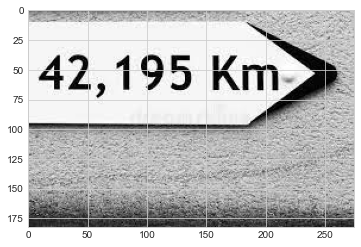

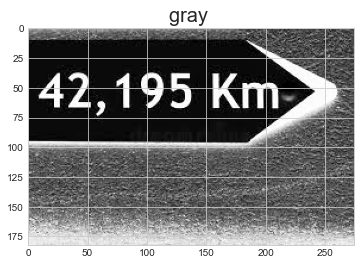

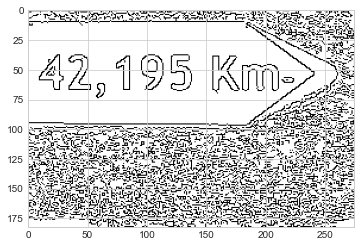

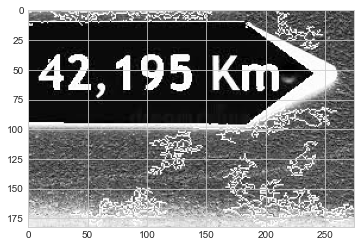

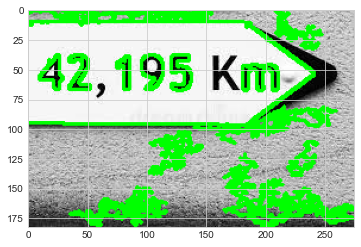

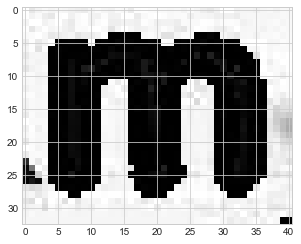

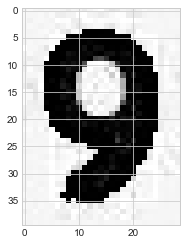

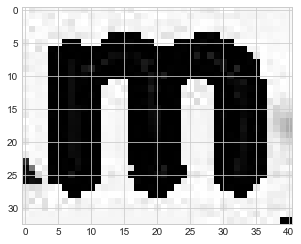

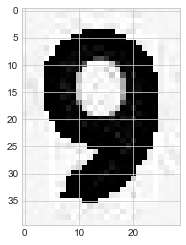

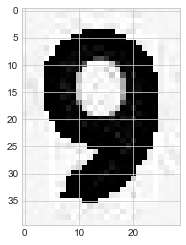

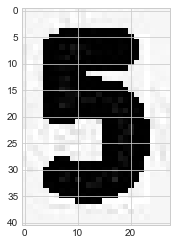

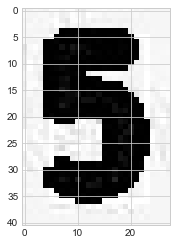

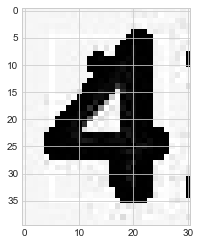

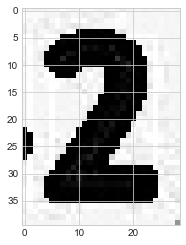

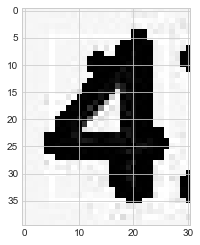

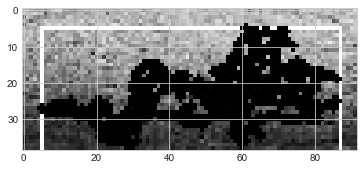

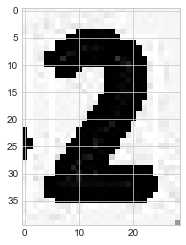

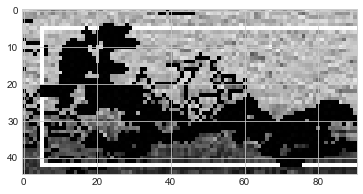

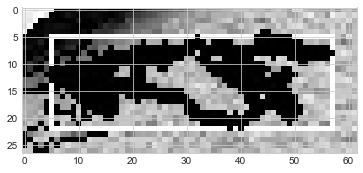

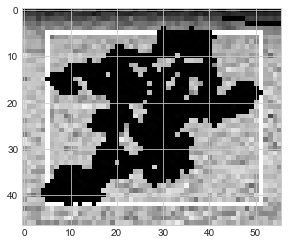

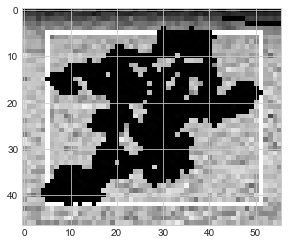

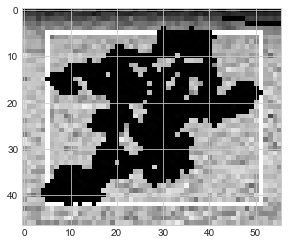

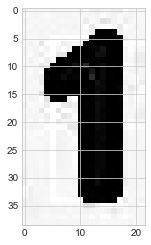

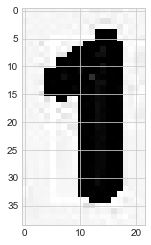

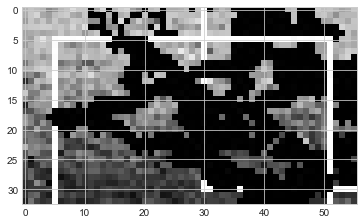

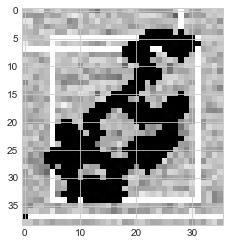

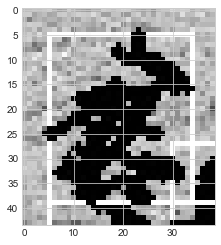

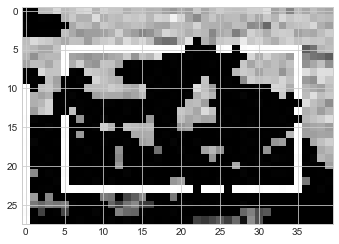

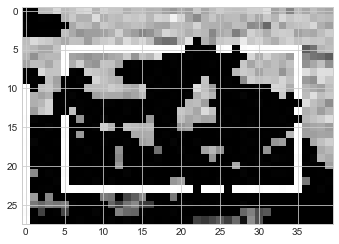

25
C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_1.jpg
25
size 2 (224, 224)


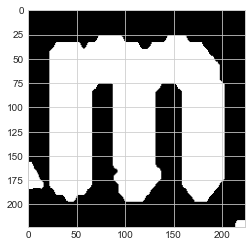

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [9.9999809e-01 1.1386473e-26 1.0583736e-24 6.7729970e-36 8.3863730e-22
 7.1616213e-23 6.0484899e-26 1.4093177e-18 2.3521188e-33 1.4060006e-16
 6.8352275e-09 1.0799740e-07 1.4423127e-10 1.1754122e-08 8.7855789e-10
 1.7759437e-10 6.7310544e-09 3.2632318e-08 5.4046563e-09 3.1968070e-09
 7.2170737e-12 3.8406728e-08 5.3500306e-09 6.2009413e-08 1.0503029e-10
 3.7288696e-11 1.2648881e-07 5.1806058e-08 9.3628429e-09 2.0730102e-08
 1.6102488e-08 1.1719138e-11 2.8169323e-11 1.0700084e-12 1.6171019e-13
 1.4411304e-06 2.0909663e-09 8.2362411e-10]
j= 0.9999981


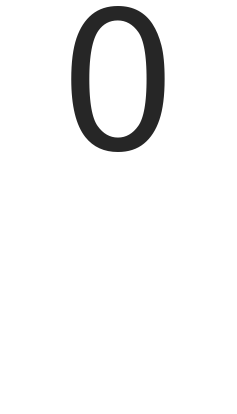

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_2.jpg
25
size 2 (224, 224)


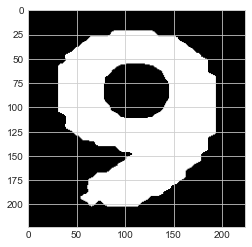

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.2698939e-04 3.2261215e-07 4.3009009e-06 1.6412200e-04 7.8708195e-04
 1.2138695e-05 9.4971216e-07 2.8825675e-03 6.7391066e-04 9.9502325e-01
 4.3301461e-06 4.5806432e-06 4.1068938e-07 9.4183852e-06 2.6870955e-06
 3.8122807e-06 4.7444100e-06 4.3161158e-06 2.7571318e-06 5.7779093e-06
 9.4307443e-06 3.0597994e-06 4.3576324e-06 5.2485739e-06 1.1877574e-06
 3.4736242e-06 6.8749309e-06 3.1023369e-06 3.9178858e-06 9.0923377e-06
 3.0851834e-06 3.0622894e-06 5.4016887e-06 3.1844656e-06 8.3879886e-06
 2.4233925e-06 4.5345146e-06 1.8621097e-06]
j= 0.99502325


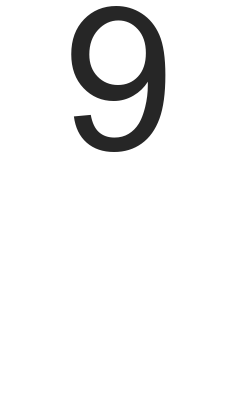

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_3.jpg
25
size 2 (224, 224)


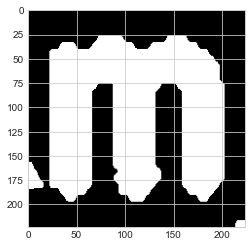

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [9.99997020e-01 1.05751165e-26 3.37497622e-25 1.75899862e-36
 5.71802179e-22 5.37625620e-23 7.99178405e-26 2.52988977e-19
 1.02876373e-33 4.62169499e-17 9.30749344e-09 1.56689794e-07
 3.65924208e-10 1.63441989e-08 1.26620836e-09 2.58157107e-10
 8.78765238e-09 4.68991530e-08 6.92606195e-09 3.73613096e-09
 8.48825784e-12 5.04099695e-08 6.57141142e-09 8.29052169e-08
 1.83448090e-10 4.03966235e-11 2.00449804e-07 7.65611006e-08
 1.27311557e-08 3.13300106e-08 2.29035173e-08 1.48863057e-11
 3.53479850e-11 1.21624802e-12 1.38723993e-13 2.31794456e-06
 2.62229638e-09 1.25542987e-09]
j= 0.999997


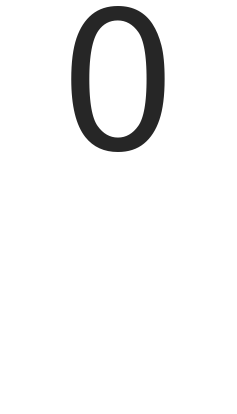

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_4.jpg
25
size 2 (224, 224)


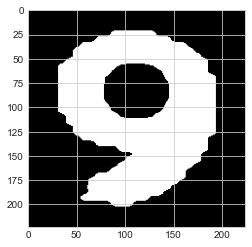

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [8.2623638e-04 1.1370978e-06 1.4644153e-05 4.9057970e-04 1.3229947e-03
 2.7082076e-05 3.0664769e-06 6.4179585e-03 1.4576382e-03 9.8924106e-01
 6.4138617e-06 6.8036529e-06 8.8792177e-07 1.4052971e-05 4.4525927e-06
 6.4302267e-06 7.7965587e-06 6.7992419e-06 4.5714864e-06 8.8370180e-06
 1.3731441e-05 4.9628934e-06 6.6857524e-06 8.8208262e-06 2.3190421e-06
 5.3352901e-06 1.0664501e-05 5.0843319e-06 6.3799730e-06 1.4036764e-05
 5.0794947e-06 5.2580017e-06 8.1684011e-06 5.0726499e-06 1.4592974e-05
 3.8500002e-06 7.1901268e-06 3.2239234e-06]
j= 0.98924106


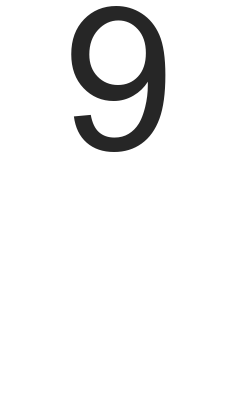

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_5.jpg
25
size 2 (224, 224)


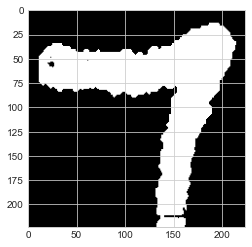

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [2.32861527e-19 2.06663956e-33 4.99730333e-22 1.41423626e-27
 8.26919897e-22 7.71741283e-24 2.80308178e-38 1.00000000e+00
 7.62344476e-35 1.24229045e-08 7.01986524e-11 3.38251982e-10
 1.68214650e-27 4.95831465e-09 3.72311214e-15 3.75185688e-14
 3.65641163e-11 3.47315177e-10 1.81375373e-10 5.65285818e-10
 3.05804123e-12 4.80729831e-11 4.61293365e-11 1.54153322e-11
 6.39018531e-22 1.66720739e-12 1.82037330e-10 2.72215648e-12
 2.81357090e-11 2.44766484e-14 2.03061222e-12 1.12574121e-13
 6.09987701e-13 5.59172760e-12 2.74120767e-14 8.31657104e-11
 2.44661513e-10 2.88609960e-15]
j= 1.0


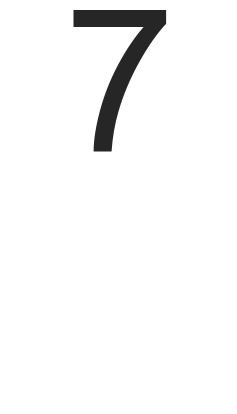

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_6.jpg
25
size 2 (224, 224)


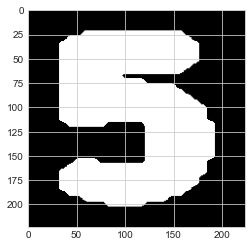

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [2.1197371e-09 2.7579944e-10 1.6680546e-10 1.2854398e-06 1.5582886e-07
 9.9999774e-01 1.2044891e-08 2.0617085e-08 3.2765087e-08 5.8695647e-08
 5.1817601e-08 2.0475300e-08 1.6696511e-08 3.9129723e-08 3.1867444e-08
 1.4936255e-08 3.6117708e-08 2.4926457e-08 2.6402615e-08 2.2571641e-08
 4.8593993e-08 4.7151946e-08 3.1480443e-08 3.8543359e-08 1.7712900e-08
 1.1259411e-08 4.4404530e-08 2.4825585e-08 2.1066588e-08 3.6543383e-08
 1.4723829e-08 7.8924707e-09 6.6723082e-08 1.3454486e-08 3.4381997e-09
 1.9673072e-08 4.7554224e-08 3.6325936e-08]
j= 0.99999774


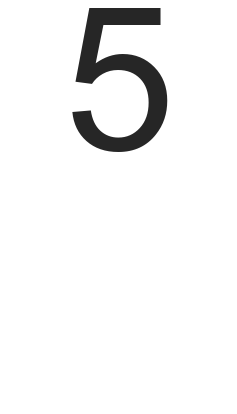

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_7.jpg
25
size 2 (224, 224)


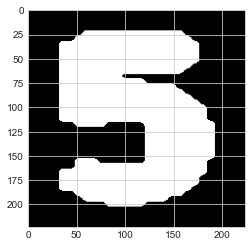

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [7.2546119e-10 8.8192766e-11 4.9214258e-11 6.0657612e-07 8.0312198e-08
 9.9999881e-01 5.4466751e-09 6.4032992e-09 1.5813443e-08 3.1125648e-08
 3.4866385e-08 1.3627594e-08 1.1402668e-08 2.7312653e-08 2.1985633e-08
 1.0492116e-08 2.3782569e-08 1.7339701e-08 1.6886416e-08 1.5268705e-08
 3.3931556e-08 3.1459344e-08 2.1850685e-08 2.5795554e-08 1.1575189e-08
 7.1291861e-09 3.1569105e-08 1.6157847e-08 1.3456785e-08 2.6468797e-08
 9.3160883e-09 4.8981970e-09 4.4912408e-08 8.9440499e-09 1.7590560e-09
 1.3802361e-08 3.3168170e-08 2.4513978e-08]
j= 0.9999988


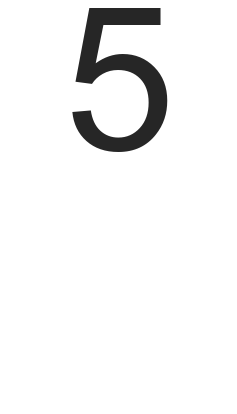

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_8.jpg
25
size 2 (224, 224)


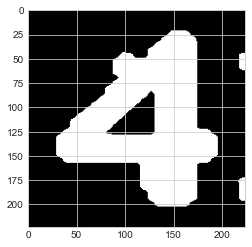

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.81815596e-04 9.71176923e-05 9.22619307e-04 4.35785187e-05
 8.86932194e-01 4.22914172e-06 2.55859195e-05 1.19893637e-03
 7.26069440e-04 1.09404482e-01 3.31132742e-06 1.31749375e-05
 3.61077286e-06 6.24705444e-06 7.69734925e-06 9.12517680e-06
 8.28098382e-06 8.16436386e-06 1.36439112e-05 9.15099827e-06
 1.33741560e-05 8.37333391e-06 1.09686489e-05 6.56886414e-06
 7.23367293e-06 7.51827338e-06 1.38465430e-06 8.91868149e-06
 8.10622987e-06 1.35756145e-05 6.67945869e-06 8.77966431e-06
 5.44275872e-06 9.10466133e-06 4.38874013e-05 8.43409907e-06
 7.40152200e-06 5.32112017e-06]
j= 0.8869322


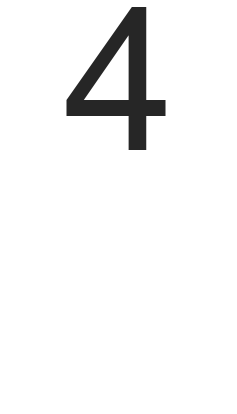

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_9.jpg
25
size 2 (224, 224)


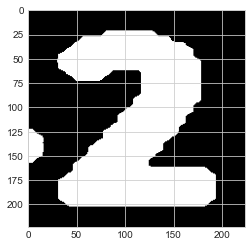

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [7.63757366e-17 1.04874578e-13 9.99999881e-01 1.75014134e-14
 4.07596787e-17 1.19142691e-15 1.29851945e-11 3.02315573e-13
 9.52319248e-16 3.28423358e-21 1.22109683e-10 6.90750290e-10
 8.27282278e-08 5.94544747e-10 2.61821453e-10 8.23959859e-11
 3.21510492e-11 8.02015176e-10 4.07428036e-10 9.58700341e-11
 1.05980259e-11 1.11940714e-10 6.67115391e-11 3.22144172e-10
 1.57751110e-08 6.43457770e-12 2.05411160e-10 8.69812444e-10
 3.17377929e-10 5.81766267e-11 3.00236447e-10 1.49093654e-11
 5.46548015e-11 5.27478394e-10 1.01755832e-12 7.07246928e-10
 1.27277799e-10 1.54391511e-09]
j= 0.9999999


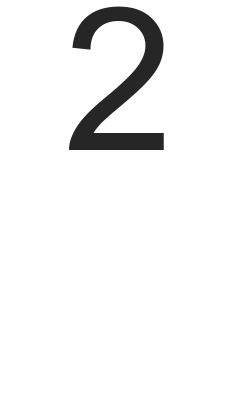

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_10.jpg
25
size 2 (224, 224)


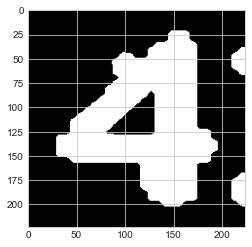

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.5298235e-03 2.1920586e-04 2.3562547e-03 1.9655540e-04 8.0037898e-01
 1.2120107e-05 1.0494517e-04 3.4681552e-03 2.4141949e-03 1.8883702e-01
 6.1785495e-06 1.8889798e-05 8.8631432e-06 9.8192259e-06 1.4321921e-05
 1.5081776e-05 1.4306168e-05 1.5295091e-05 2.2306071e-05 1.5437325e-05
 1.8740651e-05 1.5202021e-05 1.8408100e-05 1.2094428e-05 1.4986516e-05
 1.4027374e-05 2.8645206e-06 1.6220538e-05 1.3779958e-05 2.1913447e-05
 1.1938896e-05 1.6197506e-05 1.0010219e-05 1.3270191e-05 1.0459247e-04
 1.3617157e-05 1.3846059e-05 1.0687494e-05]
j= 0.800379


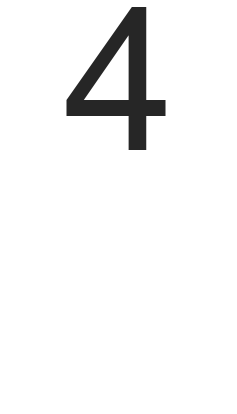

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_11.jpg
25
size 2 (224, 224)


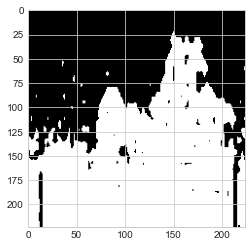

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [9.59871948e-01 1.98175344e-15 3.79729315e-08 8.77434864e-22
 8.84713074e-07 2.16867455e-14 1.27075832e-11 1.64777935e-12
 6.22061049e-16 2.23627676e-08 9.03028063e-04 5.76347578e-03
 4.17488301e-03 4.14495211e-04 4.64261335e-04 1.01154365e-04
 1.30898232e-04 8.47370422e-04 5.88737894e-04 1.29048407e-04
 3.73072521e-06 1.14545389e-03 2.36464795e-04 1.25691004e-03
 2.14264821e-03 2.54258612e-06 2.90159741e-03 2.62090494e-03
 3.66765307e-04 6.66225911e-04 1.90088525e-04 8.52175253e-06
 1.45737786e-05 7.69690450e-06 2.71829606e-07 1.43512767e-02
 1.11953144e-04 5.82148670e-04]
j= 0.95987195


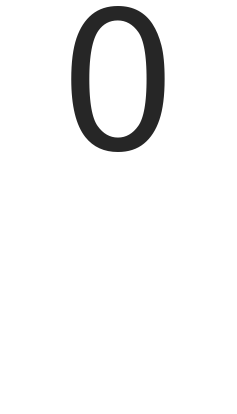

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_12.jpg
25
size 2 (224, 224)


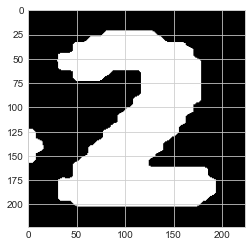

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.43820599e-17 6.30412335e-14 9.99999762e-01 5.35335072e-15
 2.09834430e-17 1.04916677e-15 1.63859187e-11 5.72901034e-14
 2.93839885e-16 7.97330772e-22 1.56015409e-10 1.00045316e-09
 1.70830475e-07 7.35282946e-10 3.43255008e-10 9.26819940e-11
 3.68023459e-11 1.07830755e-09 5.17813015e-10 1.08648229e-10
 1.07015985e-11 1.37197628e-10 7.67155506e-11 3.94434319e-10
 2.47861287e-08 5.60206005e-12 2.51695165e-10 1.13834642e-09
 4.20272123e-10 6.92248203e-11 3.61911862e-10 1.56467686e-11
 5.63313528e-11 5.62736135e-10 7.46378057e-13 9.46724144e-10
 1.43330625e-10 2.13753659e-09]
j= 0.99999976


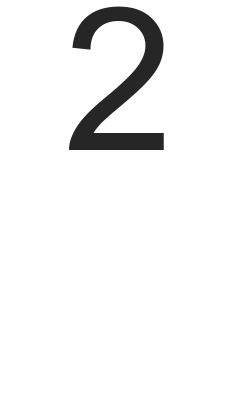

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_13.jpg
25
size 2 (224, 224)


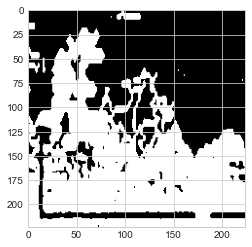

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.9841068e-23 5.7187245e-26 1.4311102e-25 1.5775944e-24 3.4053900e-25
 5.2152609e-06 4.2204920e-02 6.0246300e-38 9.9926556e-09 4.4503335e-26
 1.7977495e-09 6.8205665e-08 9.5772195e-01 3.0683125e-08 7.3687865e-08
 1.5834354e-07 1.9900231e-08 1.5598293e-07 2.5344544e-09 2.8674523e-09
 1.1154583e-09 4.2483084e-09 1.7027177e-09 3.3965197e-08 6.6660738e-05
 3.1039682e-10 4.7413035e-08 4.7453749e-08 8.6688798e-09 1.4403682e-07
 1.4347731e-09 1.9039759e-10 3.3956546e-10 1.1925656e-08 4.4644201e-15
 2.9844242e-07 1.4240103e-08 1.4682139e-07]
j= 0.95772195


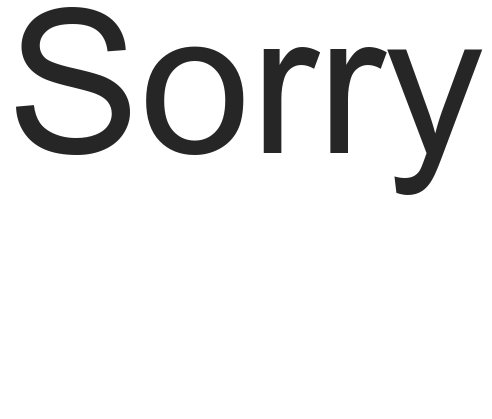

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_14.jpg
25
size 2 (224, 224)


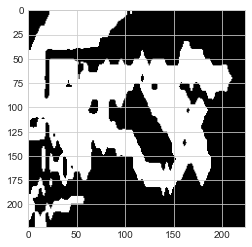

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [4.0405814e-11 7.3574153e-21 2.6247165e-15 9.3535434e-15 1.5134983e-16
 1.3528394e-11 8.3364177e-11 5.5185453e-22 9.9999940e-01 4.1441578e-10
 3.6952735e-10 1.2733171e-09 6.4214601e-07 1.7006333e-09 1.4772652e-09
 1.7561238e-09 6.5185563e-10 1.1831147e-09 8.1416007e-10 6.9131934e-10
 7.6905432e-10 5.9470667e-10 4.2929907e-10 8.9993568e-10 4.3110962e-08
 4.9247839e-10 1.6788466e-09 1.6945977e-09 3.0387157e-10 8.6303205e-09
 8.4587871e-11 1.6684583e-10 8.3167290e-10 3.1324690e-09 3.3146810e-12
 1.3414688e-08 3.4249431e-10 3.4874967e-09]
j= 0.9999994


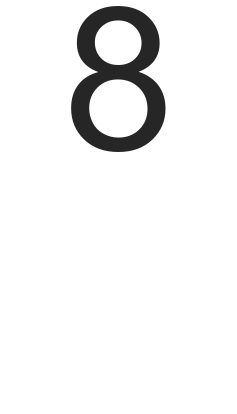

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_15.jpg
25
size 2 (224, 224)


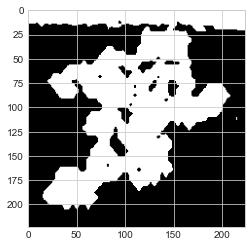

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.75724170e-12 7.11570475e-17 4.48249038e-09 1.61852154e-06
 3.43679810e-13 3.61789320e-13 1.85598867e-12 1.81799172e-12
 9.99998331e-01 2.69395581e-08 1.25602806e-09 2.67016675e-09
 1.83515017e-08 4.12769197e-09 2.65138933e-09 4.53425608e-09
 9.99883176e-10 1.29513267e-09 2.75485879e-09 5.05690068e-09
 4.34544090e-09 2.05179163e-09 2.48838505e-09 2.71953038e-09
 1.03568878e-08 1.00454933e-09 1.11284546e-08 9.75969083e-09
 2.46174570e-09 9.31190947e-09 1.02826370e-09 5.53584123e-10
 3.83379239e-09 1.60458953e-08 4.18520288e-11 1.58828701e-08
 1.59376967e-09 1.12021175e-08]
j= 0.99999833


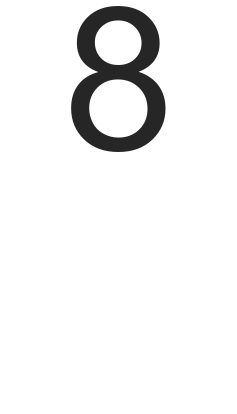

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_16.jpg
25
size 2 (224, 224)


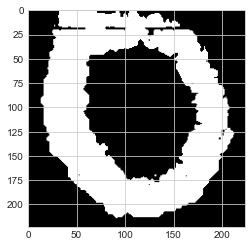

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.5094538e-25 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 5.4221245e-25 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.4064534e-38
 1.2867403e-14 3.6916579e-05 1.8212170e-22 1.5432857e-05 6.0623639e-14
 1.1693590e-12 1.3912099e-11 1.2146029e-02 3.2739662e-09 4.0051221e-10
 4.3417811e-19 2.2420659e-08 1.3649959e-08 1.1252394e-05 6.0340539e-22
 1.2755212e-19 7.7162083e-20 1.1443219e-10 2.1528934e-09 6.5757582e-09
 1.8625610e-11 9.1017913e-23 1.6878601e-17 4.1977409e-21 0.0000000e+00
 9.8779011e-01 1.5796050e-07 2.4075059e-16]
j= 0.9877901


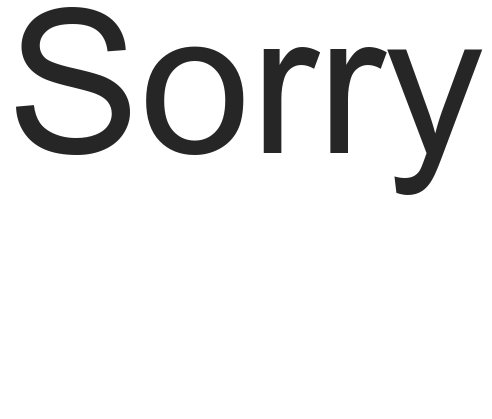

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_17.jpg
25
size 2 (224, 224)


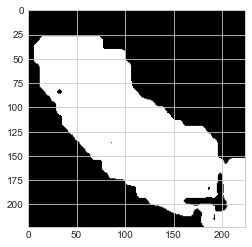

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [2.0570084e-03 4.4937755e-07 7.5870274e-05 6.0671213e-05 1.6132253e-05
 1.7526809e-03 9.6544981e-01 1.1882540e-06 2.7809661e-02 1.4145616e-03
 9.8746896e-06 2.5725334e-05 3.4817515e-04 2.2947805e-05 6.2692416e-05
 2.5963176e-05 4.3672175e-05 2.2253615e-05 3.6601970e-05 3.0456851e-05
 1.9004126e-05 3.8417442e-05 1.5492531e-05 2.9847659e-05 2.1981215e-04
 3.2588014e-05 1.6243390e-05 3.6754827e-05 2.3841038e-05 1.6242815e-05
 2.9643950e-05 4.1793552e-05 3.1673859e-05 2.1841013e-05 4.9707283e-05
 2.0640433e-05 2.3112463e-05 6.6866072e-05]
j= 0.9654498


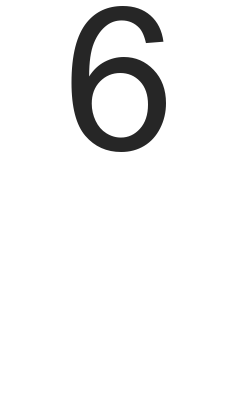

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_18.jpg
25
size 2 (224, 224)


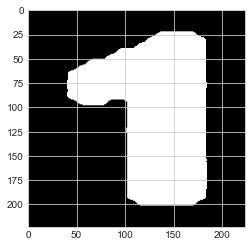

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [8.47831143e-06 8.12087251e-08 1.06347376e-04 1.80124334e-06
 1.21659093e-06 1.99901500e-08 1.89632154e-09 9.99840975e-01
 5.65716346e-06 2.02723186e-05 9.00080295e-07 3.67906495e-07
 6.00002270e-10 4.98792474e-07 1.03714108e-07 1.89920812e-07
 4.41119909e-07 5.57446015e-07 4.71933845e-07 7.76170793e-07
 1.98166148e-07 4.21756965e-07 3.93026625e-07 1.92397749e-07
 1.00204396e-08 8.55391022e-07 1.49679499e-06 1.33431669e-07
 4.05736245e-07 1.82571071e-07 3.91999066e-07 4.30282142e-07
 2.41304519e-07 6.33719992e-07 3.85606245e-06 3.06380031e-07
 5.23454332e-07 8.08392144e-08]
j= 0.999841


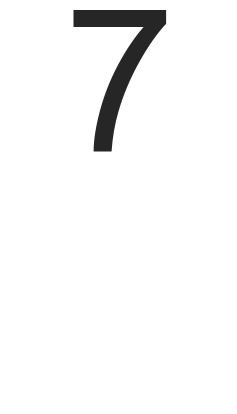

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_19.jpg
25
size 2 (224, 224)


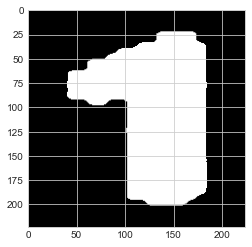

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.2715015e-05 6.6293381e-08 7.5492586e-05 1.2341827e-06 8.7714096e-07
 1.3398932e-08 1.4129806e-09 9.9986744e-01 4.5035436e-06 2.3151933e-05
 8.5891071e-07 3.5745705e-07 4.8941429e-10 4.8549708e-07 9.7814130e-08
 1.7830776e-07 4.3789282e-07 5.2905312e-07 4.5804768e-07 7.5042021e-07
 1.8583344e-07 4.1016824e-07 4.0188363e-07 1.7669522e-07 8.6155483e-09
 8.3930536e-07 1.4241125e-06 1.3255446e-07 3.9917657e-07 1.7465482e-07
 3.8271426e-07 4.0873749e-07 2.3189119e-07 6.1260130e-07 3.7994844e-06
 2.9681433e-07 5.0817437e-07 7.5942410e-08]
j= 0.99986744


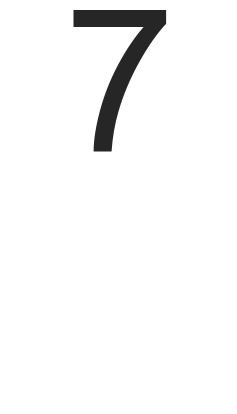

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_20.jpg
25
size 2 (224, 224)


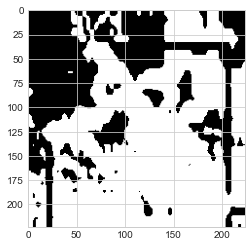

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.3739202e-07 8.9710877e-26 8.4775128e-16 1.1170674e-08 2.1836962e-21
 1.7229745e-09 1.2117344e-13 1.5465507e-25 9.9959654e-01 2.6378963e-10
 1.5773683e-08 7.1744284e-07 3.7486030e-04 1.3252033e-07 3.7033070e-07
 7.5816054e-08 1.3443942e-07 1.8217609e-06 7.8721875e-08 1.2299262e-07
 8.4749248e-09 2.5065907e-07 1.5441685e-07 3.9401124e-07 7.9602823e-06
 1.9766222e-08 1.1409212e-09 1.5534503e-07 1.5287851e-08 3.1709690e-06
 1.5642993e-08 4.3400236e-10 2.5069719e-08 1.0473107e-07 1.1218646e-13
 1.2408536e-05 6.6690461e-08 2.9198503e-07]
j= 0.99959654


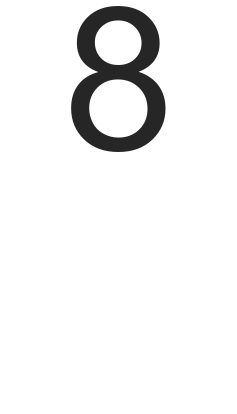

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_21.jpg
25
size 2 (224, 224)


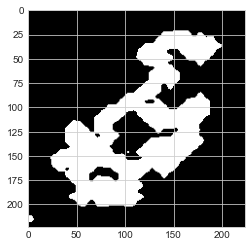

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [8.8472312e-08 6.3122960e-09 9.8306990e-01 4.5965309e-04 7.0152106e-09
 1.4130138e-07 8.9811190e-04 8.5304093e-09 1.5036601e-02 2.0543314e-09
 1.9779059e-06 3.5841247e-06 3.1837824e-04 4.6387818e-06 7.3348083e-06
 2.8386582e-06 1.9668587e-06 2.8245781e-06 4.1867115e-06 1.0727276e-05
 3.1758495e-06 4.2185948e-06 3.9188990e-06 3.3472104e-06 7.2192299e-05
 2.9486623e-06 1.4674885e-05 9.2661794e-06 5.0245185e-06 4.1106305e-06
 6.8140303e-06 2.6019050e-06 4.2453121e-06 9.3761300e-06 1.7619931e-06
 6.2950703e-06 2.1365854e-06 2.0962245e-05]
j= 0.9830699


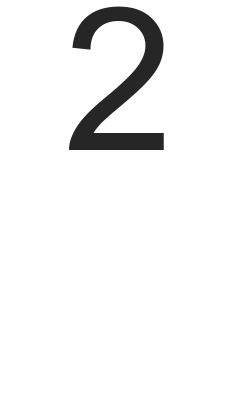

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_22.jpg
25
size 2 (224, 224)


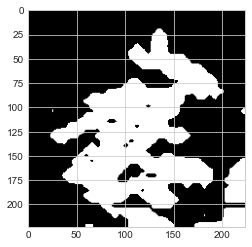

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.13910931e-07 1.42016283e-08 2.25058228e-01 8.39397020e-04
 5.47117565e-07 5.37878179e-07 2.03141547e-03 6.25325583e-07
 7.70882905e-01 7.97752989e-07 7.68460905e-06 1.50142996e-05
 4.00604971e-04 1.80865900e-05 2.45886622e-05 1.54948211e-05
 8.87309034e-06 1.16265865e-05 1.59535684e-05 4.64954792e-05
 1.56074002e-05 1.56536407e-05 2.23175866e-05 1.26593550e-05
 1.87343918e-04 1.35423425e-05 4.43386780e-05 3.06254915e-05
 2.86726117e-05 1.84709697e-05 2.84335310e-05 1.66177942e-05
 1.66817845e-05 4.67934296e-05 1.81892010e-05 3.11273870e-05
 1.07158985e-05 6.29530914e-05]
j= 0.7708829


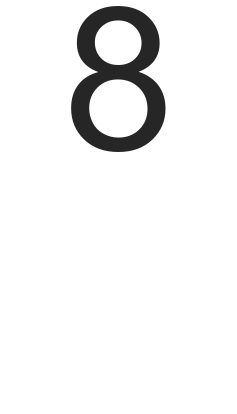

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_23.jpg
25
size 2 (224, 224)


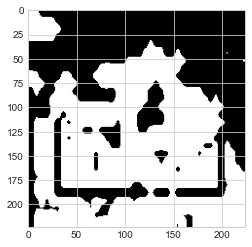

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.6294939e-05 2.5732048e-13 2.6677569e-06 3.1771460e-12 5.6589493e-09
 1.6688689e-07 1.1208885e-01 1.4407676e-15 1.1487331e-03 4.6056300e-08
 2.7391722e-04 6.3395646e-04 8.3488357e-01 3.8462807e-04 8.9157058e-04
 2.2825740e-04 1.5202002e-04 7.0110575e-04 1.7358185e-04 1.6501601e-04
 1.2302699e-05 5.8192370e-04 1.2439146e-04 5.3282449e-04 4.1120440e-02
 4.8788599e-05 1.4945300e-03 4.8700438e-04 1.7814874e-04 5.7282695e-04
 1.4601188e-04 3.1527034e-05 8.3007792e-05 7.4490563e-05 5.4986349e-06
 1.3124901e-03 1.1039586e-04 1.3188602e-03]
j= 0.8348836


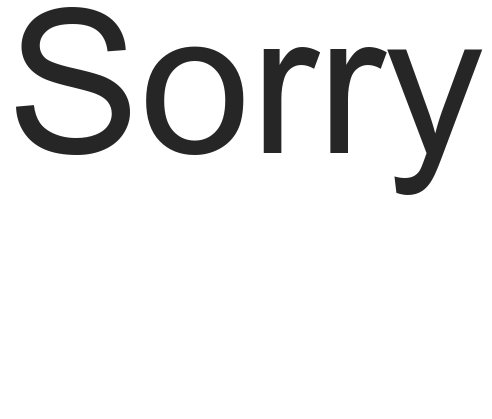

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_24.jpg
25
size 2 (224, 224)


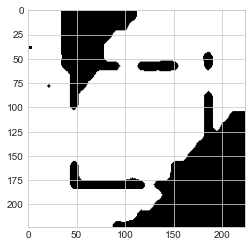

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.34823804e-05 3.91845531e-15 4.94330651e-13 3.66670827e-09
 4.19607035e-15 1.82465300e-07 2.99742142e-09 7.13728242e-18
 9.99978662e-01 4.95329333e-09 8.91634500e-09 3.53549403e-08
 6.13594784e-06 2.42172202e-08 4.83694720e-08 4.23891215e-08
 2.53580907e-08 3.91367401e-08 2.10893845e-08 2.64111772e-08
 1.17543202e-08 2.31759003e-08 1.29020625e-08 3.02476053e-08
 4.17183543e-07 4.81416720e-08 4.79567097e-09 4.17526422e-08
 7.65733787e-09 2.38585670e-07 4.92782215e-09 6.04544903e-09
 3.55998289e-08 4.23573603e-08 9.01863445e-11 2.38783485e-07
 8.21225754e-09 5.91202465e-08]
j= 0.99997866


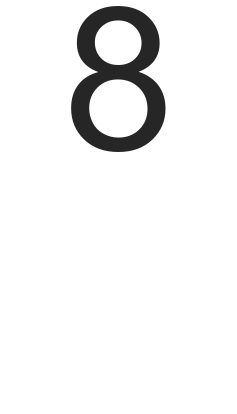

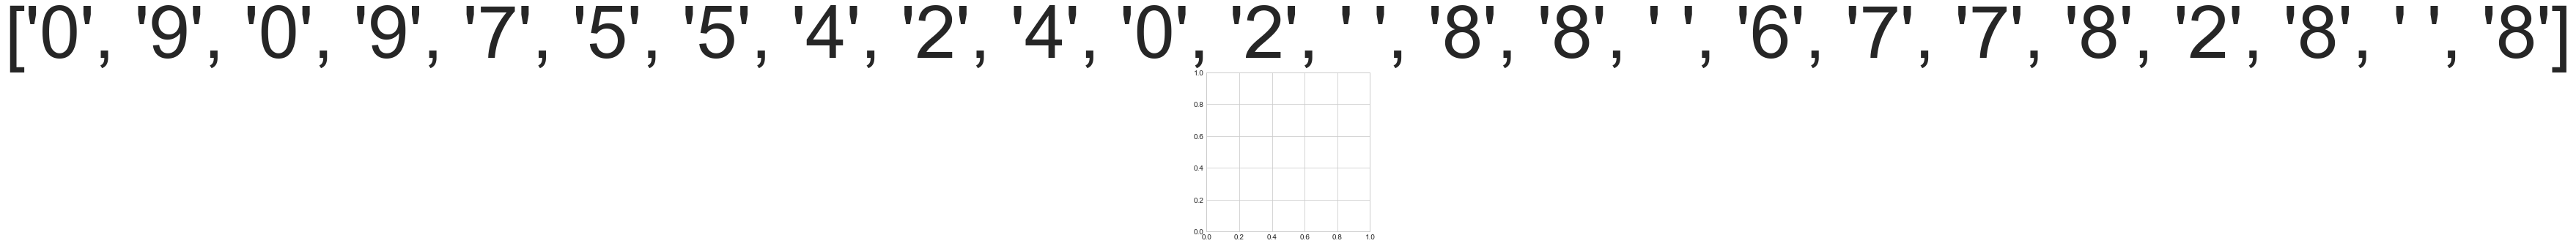

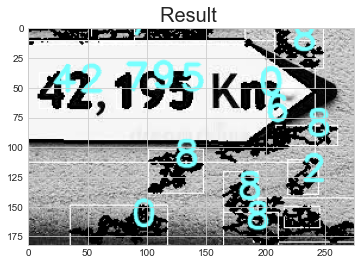

['0', '9', '0', '9', '7', '5', '5', '4', '2', '4', '0', '2', ' ', '8', '8', ' ', '6', '7', '7', '8', '2', '8', ' ', '8']
Please key in the digits on the images42195
[4, 2, 1, 9, 5]
24
24
24
[4, 0, 0, 0, 0]
[4, 2, 0, 0, 0]
[4, 2, 0, 9, 0]
[4, 2, 0, 9, 5]
accuracy for the predicted output and orginal image=80.0%
334/334 [==============================] - 48s 141ms/step - loss: 0.0697 - accuracy: 0.9806
loss= 6.967499107122421
accuracy= 98.05999994277954
Option to recognise Digit
1. multiple digit
2. single digit
3. receipt with multiple digits
4. Automated recognition for simple & NON Stacked Digit scenario
5. Automated recognition for Stacked Digit cropped image scenario
6. Automated recognition for NON Stacked Digit cropped image scenario
7. Automated recognition for simple & Stacked Digit scenario
8. Automated recognition for Receipt (NON Stacked Digit)cropped image scenario
enter the option, n or N to exit8
Enter your file path of folder that contain input image,n or N to exit= C:\Us

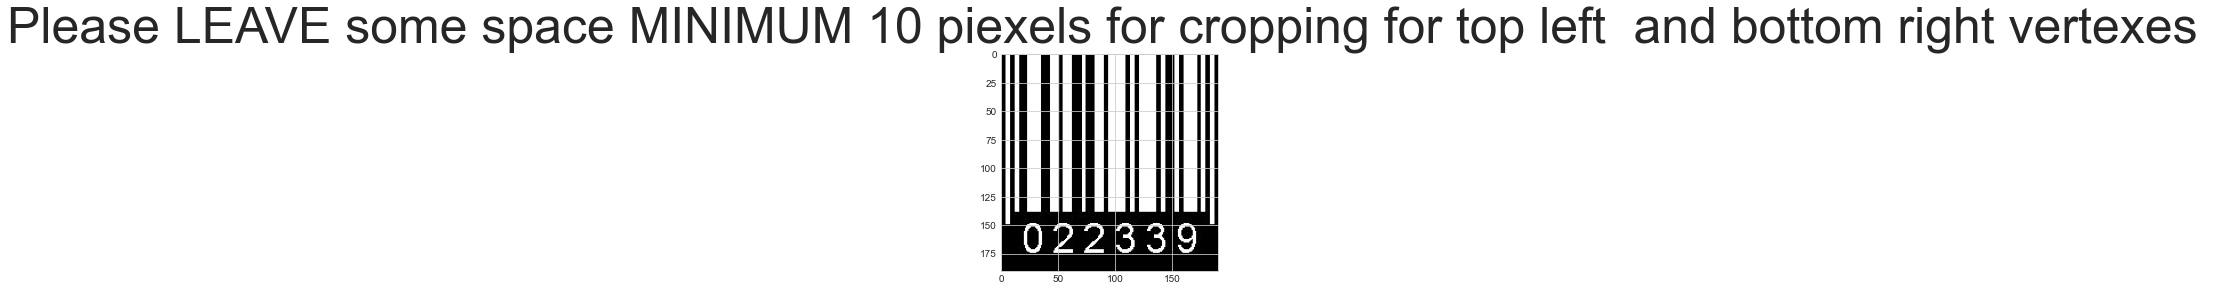

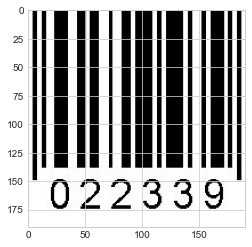

enter the x of 1st coordinate(top left vertex ) to crop the image=20
enter the y of 1st coordinate(top left vertex ) to crop the image=140
enter the  x of 2nd coordinate (bottom right vertex ) to crop the image=180
enter the  y of 2nd coordinate (bottom right vertex ) to crop the image=180


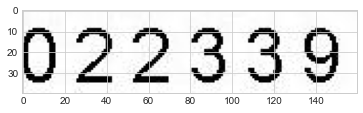

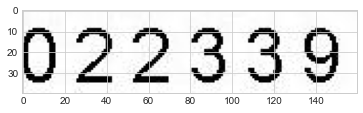

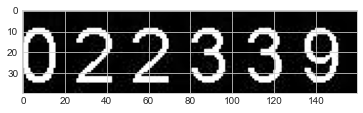

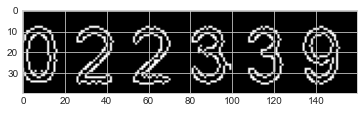

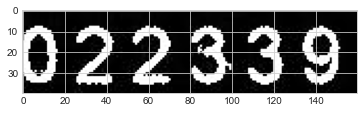

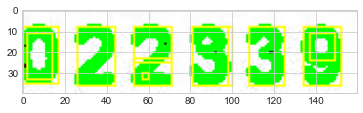

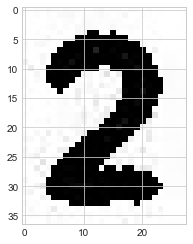

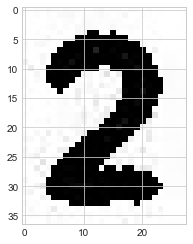

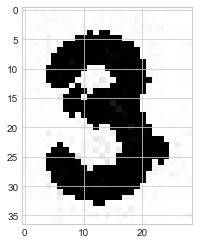

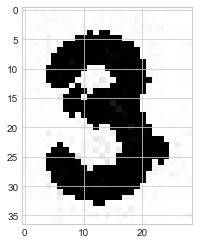

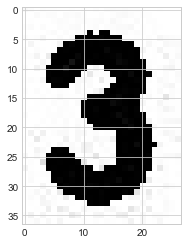

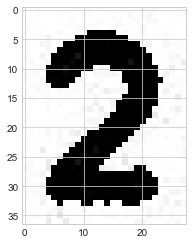

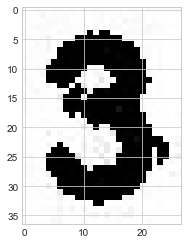

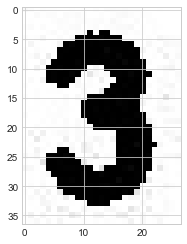

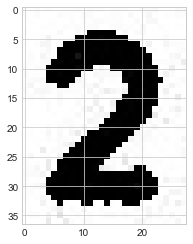

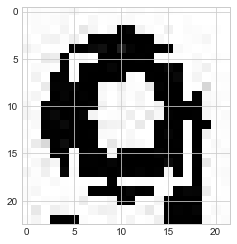

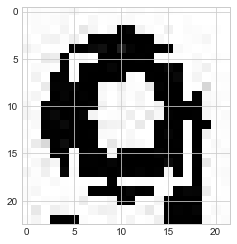

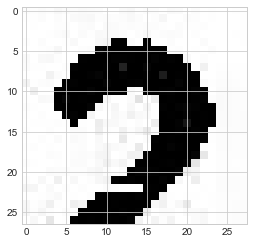

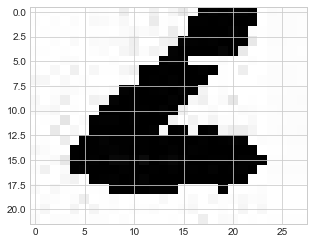

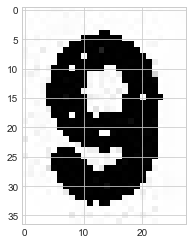

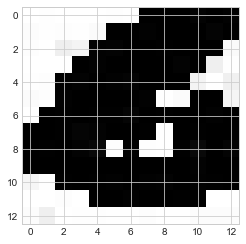

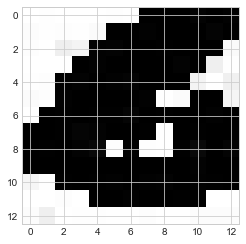

17
C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_1.jpg
17
size 2 (224, 224)


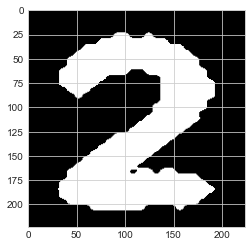

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [2.09423489e-13 1.24485743e-11 1.00000000e+00 3.16957918e-11
 1.00799642e-12 2.69831412e-13 1.18234167e-09 7.29434457e-10
 2.33094898e-11 1.07656172e-15 5.11316933e-10 1.29651645e-09
 3.35660992e-08 1.19486943e-09 8.29885938e-10 4.21510937e-10
 2.39365722e-10 1.26982058e-09 8.89404161e-10 7.91061494e-10
 1.06477945e-10 4.77758444e-10 5.28583288e-10 9.83675474e-10
 2.10139444e-08 1.71257952e-10 1.33432887e-09 1.74374859e-09
 8.90718166e-10 2.35945680e-10 1.20598087e-09 2.25317945e-10
 5.34654931e-10 1.92903493e-09 1.17165055e-10 1.27108546e-09
 4.44797726e-10 2.86154656e-09]
j= 1.0


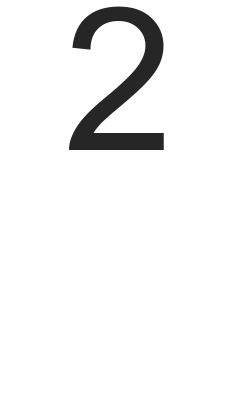

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_2.jpg
17
size 2 (224, 224)


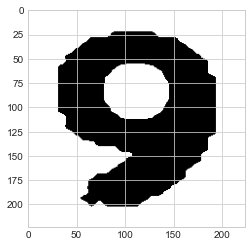

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [5.84926863e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.77939922e-27 8.13863267e-07 0.00000000e+00 1.06544870e-37
 0.00000000e+00 1.03162757e-17 1.60921854e-09 2.42962991e-03
 3.01197399e-15 2.69648456e-03 9.08064663e-08 5.86539159e-07
 4.36274860e-07 2.96657741e-01 1.26606428e-05 4.54976635e-06
 2.16667725e-11 2.71344543e-05 4.57338174e-05 1.95722864e-03
 7.11974221e-14 1.24082905e-11 4.92472613e-14 2.79320966e-06
 2.55200412e-05 2.47090320e-05 3.65282524e-08 1.46708627e-13
 3.25245803e-10 5.10700076e-12 8.23097567e-25 6.95488572e-01
 6.25376997e-04 4.83149187e-10]
j= 0.6954886


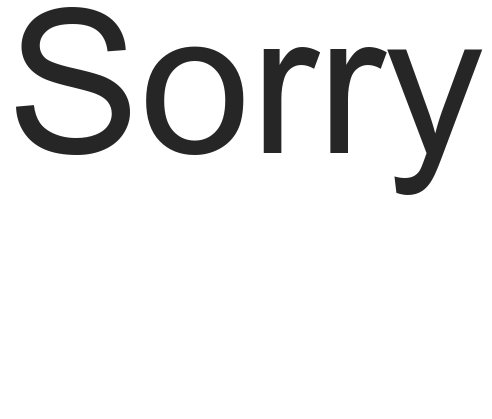

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_3.jpg
17
size 2 (224, 224)


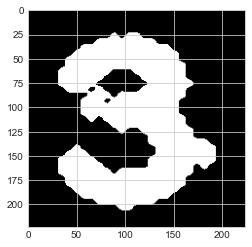

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [2.89928221e-06 9.03467310e-07 1.07893153e-04 9.94756818e-01
 1.28244310e-05 7.41387703e-06 2.73108435e-05 1.47988721e-05
 4.85295802e-03 1.69259816e-04 6.44765237e-07 1.06401581e-06
 3.89506067e-06 1.32277808e-06 1.48980882e-06 1.49970754e-06
 1.29216801e-06 5.45024022e-07 1.72748321e-06 1.89703940e-06
 2.36985261e-06 1.94368295e-06 1.40081443e-06 2.81101870e-06
 2.93325365e-06 4.80044378e-07 2.85665305e-06 2.13187400e-06
 1.53908650e-06 2.43531508e-06 1.59348554e-06 3.79278021e-07
 2.05823517e-06 1.37604627e-06 1.16164756e-07 1.07289304e-06
 1.17675336e-06 2.82004589e-06]
j= 0.9947568


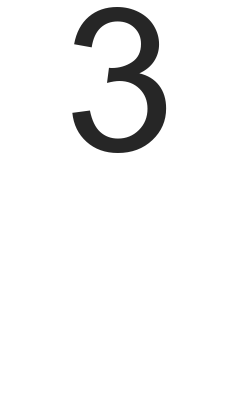

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_4.jpg
17
size 2 (224, 224)


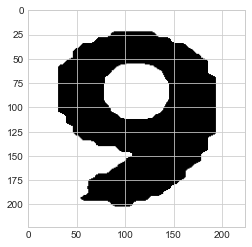

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [5.5743510e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.2839074e-29
 1.8312942e-07 0.0000000e+00 1.6085146e-38 0.0000000e+00 1.2039944e-18
 1.1506103e-09 1.8403457e-03 9.7816265e-16 2.2182723e-03 5.2494279e-08
 2.9991131e-07 2.8850550e-07 2.7005863e-01 8.8326951e-06 3.6031754e-06
 1.1037054e-11 2.0400923e-05 3.4201108e-05 1.5410723e-03 2.2280126e-14
 6.9897209e-12 3.6937467e-14 2.1188280e-06 1.6512853e-05 1.7874007e-05
 2.6912284e-08 6.2602342e-14 1.5949486e-10 1.9674243e-12 2.3176553e-25
 7.2376275e-01 4.7461284e-04 2.3623303e-10]
j= 0.72376275


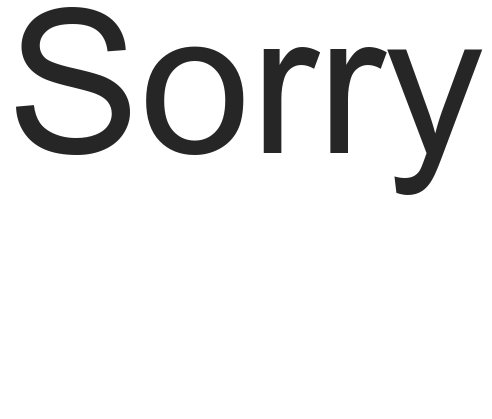

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_5.jpg
17
size 2 (224, 224)


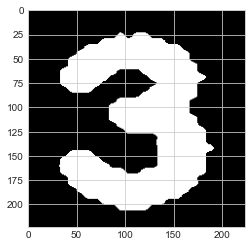

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [4.6406545e-09 2.1259761e-09 1.1941345e-06 9.9996686e-01 2.9686364e-09
 8.5532088e-07 7.0553888e-08 1.0341288e-07 9.5574096e-06 1.4605258e-08
 1.7882924e-07 8.6563671e-07 1.4185364e-06 7.9525563e-07 4.8319549e-07
 7.0975506e-07 6.0339102e-07 3.7490776e-07 9.6509291e-07 3.3410561e-07
 1.5914864e-06 1.5685813e-06 8.1606413e-07 1.2908644e-06 1.5076757e-06
 1.8220544e-07 2.2755509e-07 5.1749902e-07 7.2262543e-07 1.1634050e-06
 6.7439078e-07 1.3157708e-08 9.1503870e-07 6.4091495e-07 5.9306410e-10
 6.8467256e-07 9.4588307e-07 1.1122461e-06]
j= 0.99996686


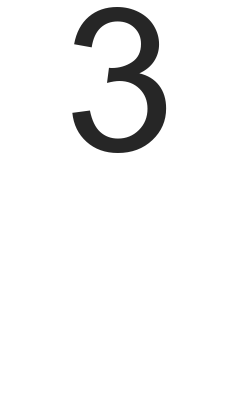

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_6.jpg
17
size 2 (224, 224)


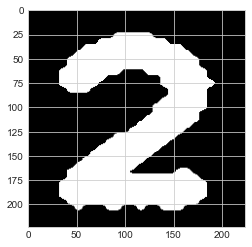

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.3338004e-11 2.6604494e-10 9.9999964e-01 5.4119265e-09 8.9637901e-11
 7.8354163e-12 2.3824493e-08 2.6215943e-08 4.5146296e-09 3.8163963e-13
 2.6253459e-09 6.7263164e-09 8.2204423e-08 6.3687855e-09 4.8378768e-09
 3.2097525e-09 2.1757036e-09 6.0549690e-09 4.4147357e-09 6.9899677e-09
 1.0342486e-09 3.1336049e-09 4.6936659e-09 5.4635563e-09 8.5839339e-08
 2.1669695e-09 7.4880786e-09 9.1098054e-09 5.0580455e-09 1.7564357e-09
 7.9110540e-09 2.0094435e-09 4.4312793e-09 1.2184501e-08 1.7455148e-09
 6.6651307e-09 3.0682574e-09 1.4140418e-08]
j= 0.99999964


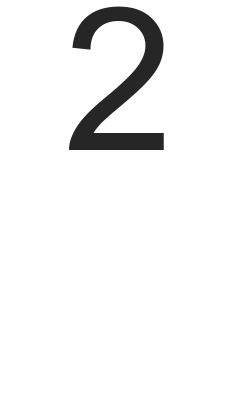

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_7.jpg
17
size 2 (224, 224)


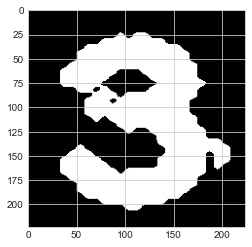

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.1228536e-06 2.5772979e-07 3.3832643e-05 9.9893922e-01 1.6187745e-06
 4.0792074e-06 4.8628417e-06 4.2234237e-06 9.4215851e-04 3.9122486e-05
 4.2838266e-07 6.8428534e-07 2.2556396e-06 8.6793216e-07 8.8565849e-07
 9.0177622e-07 8.1740063e-07 3.6205444e-07 1.0956018e-06 1.0623038e-06
 1.9935662e-06 1.2895058e-06 9.4640529e-07 1.7291109e-06 2.0150990e-06
 2.7770770e-07 1.3915013e-06 1.0877550e-06 9.9190186e-07 1.7086531e-06
 1.0510958e-06 1.2475853e-07 1.3879149e-06 9.0641316e-07 2.5504420e-08
 7.2472682e-07 8.2625149e-07 1.6896313e-06]
j= 0.9989392


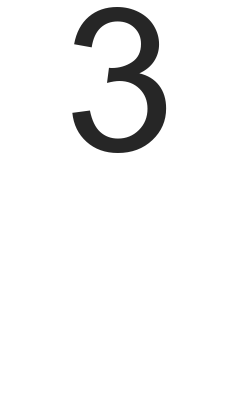

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_8.jpg
17
size 2 (224, 224)


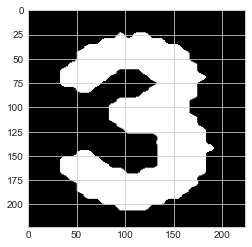

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.0442546e-09 1.2595427e-09 9.5682208e-07 9.9997175e-01 1.6790468e-09
 6.0273254e-07 4.7745569e-08 6.3478012e-08 7.3709411e-06 1.0138684e-08
 1.5685566e-07 8.1648381e-07 1.3467129e-06 7.3043969e-07 4.3405333e-07
 6.2899170e-07 5.3522018e-07 3.4567685e-07 8.6672139e-07 2.9572357e-07
 1.4532347e-06 1.4289549e-06 7.4362191e-07 1.1874855e-06 1.4017588e-06
 1.5919714e-07 1.9892774e-07 4.5576198e-07 6.3500016e-07 1.0739369e-06
 6.0158408e-07 1.0873569e-08 8.0256689e-07 5.8605445e-07 4.2260673e-10
 6.3670421e-07 8.4706301e-07 9.8885232e-07]
j= 0.99997175


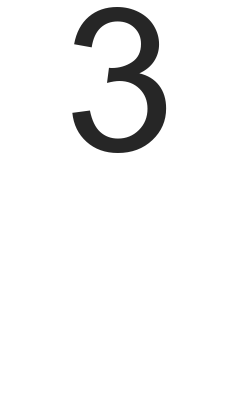

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_9.jpg
17
size 2 (224, 224)


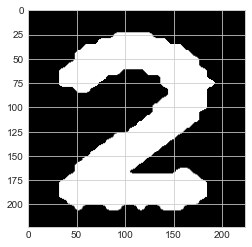

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [7.08547717e-12 1.34787223e-10 9.99999762e-01 4.20013535e-09
 4.25928910e-11 4.21983412e-12 1.43803129e-08 1.87822415e-08
 3.41812623e-09 1.78436787e-13 2.16046558e-09 5.85152105e-09
 7.62382442e-08 5.48461632e-09 3.98518818e-09 2.61288235e-09
 1.73609205e-09 5.25329957e-09 3.72663989e-09 5.78126436e-09
 8.78946527e-10 2.64193800e-09 3.92926003e-09 4.57691751e-09
 7.49394076e-08 1.72540959e-09 6.47779741e-09 7.94385091e-09
 4.19727630e-09 1.47450707e-09 6.69431932e-09 1.57139590e-09
 3.62695673e-09 1.08558647e-08 1.24929211e-09 5.81045967e-09
 2.55886223e-09 1.23905295e-08]
j= 0.99999976


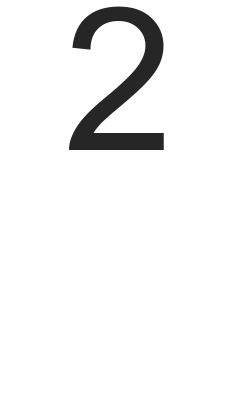

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_10.jpg
17
size 2 (224, 224)


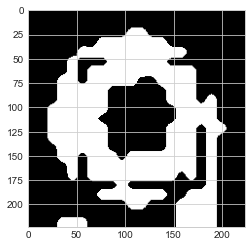

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [9.76180077e-01 5.36843833e-11 1.70257619e-09 2.14167434e-11
 4.40413351e-06 1.33771928e-05 1.96253657e-02 1.33628011e-10
 3.76161573e-08 6.40828221e-04 2.82587080e-05 6.60964433e-05
 8.67814815e-04 3.67313150e-05 2.62440386e-04 3.52927746e-05
 4.74912595e-05 7.59078976e-05 2.20125003e-05 4.45041878e-05
 2.39771680e-06 1.84675955e-04 3.26977461e-05 2.45059171e-04
 8.32443824e-04 8.33189188e-05 1.01015117e-04 1.02952370e-04
 2.56702860e-05 1.49239713e-04 5.22838491e-05 1.91624185e-05
 3.08663330e-05 2.63447714e-06 1.01423002e-05 1.07512395e-04
 2.40217887e-05 4.34727517e-05]
j= 0.9761801


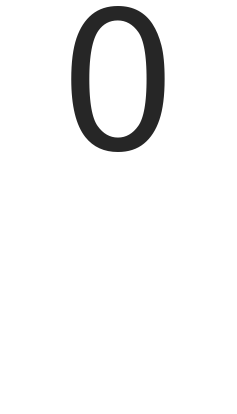

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_11.jpg
17
size 2 (224, 224)


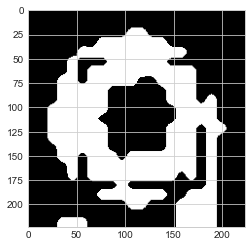

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [9.76180077e-01 5.36843833e-11 1.70257619e-09 2.14167434e-11
 4.40413351e-06 1.33771928e-05 1.96253657e-02 1.33628011e-10
 3.76161573e-08 6.40828221e-04 2.82587080e-05 6.60964433e-05
 8.67814815e-04 3.67313150e-05 2.62440386e-04 3.52927746e-05
 4.74912595e-05 7.59078976e-05 2.20125003e-05 4.45041878e-05
 2.39771680e-06 1.84675955e-04 3.26977461e-05 2.45059171e-04
 8.32443824e-04 8.33189188e-05 1.01015117e-04 1.02952370e-04
 2.56702860e-05 1.49239713e-04 5.22838491e-05 1.91624185e-05
 3.08663330e-05 2.63447714e-06 1.01423002e-05 1.07512395e-04
 2.40217887e-05 4.34727517e-05]
j= 0.9761801


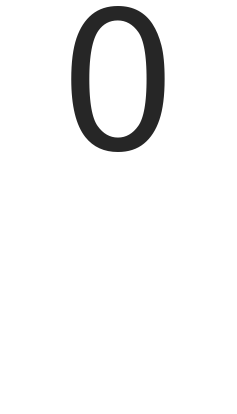

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_12.jpg
17
size 2 (224, 224)


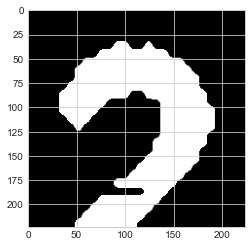

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [2.4148337e-04 1.0950132e-06 2.6353842e-04 5.3067371e-04 3.6815743e-04
 4.3643642e-05 3.5990334e-07 9.9783045e-01 2.1737223e-04 3.9706528e-04
 7.7658842e-06 3.4643613e-06 3.0525481e-08 4.5732363e-06 1.5628121e-06
 2.6546581e-06 5.1674888e-06 5.0356962e-06 3.3155075e-06 5.6947588e-06
 2.4968763e-06 3.7294283e-06 2.9426340e-06 2.6802263e-06 2.3695031e-07
 5.6502263e-06 5.0260192e-06 1.4010121e-06 3.8496632e-06 2.8719417e-06
 3.1532061e-06 2.9080297e-06 4.0438458e-06 3.1571690e-06 1.5795920e-05
 2.1985757e-06 3.5674836e-06 1.1786502e-06]
j= 0.99783045


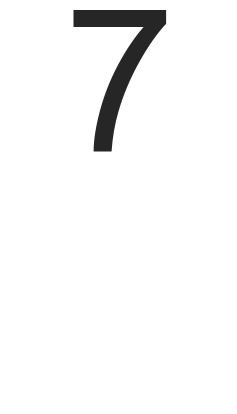

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_13.jpg
17
size 2 (224, 224)


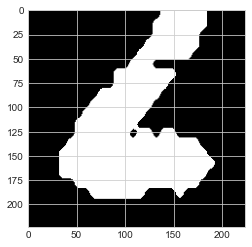

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [1.0151073e-07 3.3076412e-07 2.9575631e-05 2.7899577e-07 6.7709107e-07
 4.1533276e-05 9.9972385e-01 1.3722734e-09 7.8450239e-06 4.3993083e-08
 1.2325282e-06 2.3398825e-06 9.1551199e-05 1.3048160e-06 4.9017171e-06
 2.6686669e-06 2.6649334e-06 1.9519841e-06 2.3967857e-06 1.9112997e-06
 1.1023548e-06 2.1942226e-06 1.7649361e-06 1.9278873e-06 4.2419793e-05
 2.9598471e-06 1.4219838e-06 2.7202689e-06 1.8101880e-06 6.5595810e-07
 3.4936004e-06 2.6296016e-06 1.7864133e-06 2.4740662e-06 1.7695016e-06
 1.3195586e-06 2.3044431e-06 8.1261114e-06]
j= 0.99972385


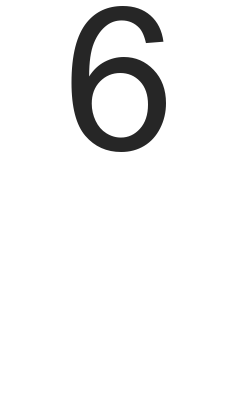

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_14.jpg
17
size 2 (224, 224)


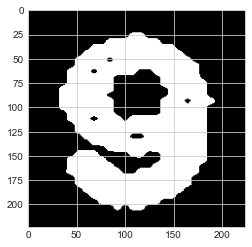

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [3.9979503e-02 1.0010466e-04 3.1469882e-02 6.1462909e-01 1.0607140e-03
 1.3117125e-04 9.0251182e-04 3.4075922e-03 5.0365083e-02 2.5728136e-01
 1.0092641e-05 1.9241075e-05 4.4061322e-05 2.6301688e-05 2.0842372e-05
 2.5972391e-05 2.2334560e-05 1.2574745e-05 1.9636183e-05 3.0745683e-05
 2.2094382e-05 2.8368884e-05 1.8894922e-05 3.6252015e-05 4.7522488e-05
 7.9669444e-06 1.7405606e-05 2.3402399e-05 1.7493570e-05 4.4045064e-05
 2.2483791e-05 1.8906638e-05 1.8939121e-05 1.7144992e-05 2.9007695e-05
 1.6161652e-05 2.1937773e-05 3.3115666e-05]
j= 0.6146291


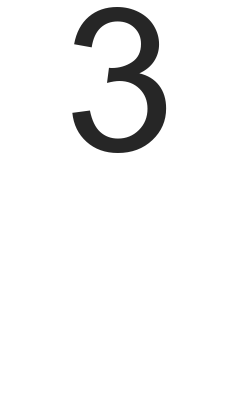

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_15.jpg
17
size 2 (224, 224)


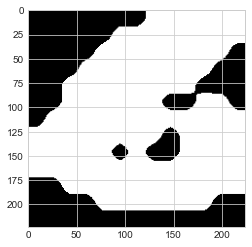

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [9.3564463e-01 2.5116465e-06 4.3286048e-04 1.3398149e-05 1.1567730e-05
 3.9207687e-05 5.8494017e-02 8.7710686e-07 2.9087872e-03 1.2703685e-03
 1.2496681e-05 1.7735772e-05 2.8428485e-04 1.7526954e-05 4.2976626e-05
 2.2049951e-05 3.3713055e-05 2.2627532e-05 2.4815436e-05 2.4898880e-05
 1.3695475e-05 3.9273629e-05 1.3893871e-05 2.4584191e-05 1.8644301e-04
 5.2154242e-05 3.4115110e-05 2.4950961e-05 1.6983447e-05 2.3614446e-05
 3.3172699e-05 3.4253891e-05 2.4716946e-05 1.3006246e-05 6.7417532e-05
 1.9502691e-05 1.5731976e-05 4.0898562e-05]
j= 0.9356446


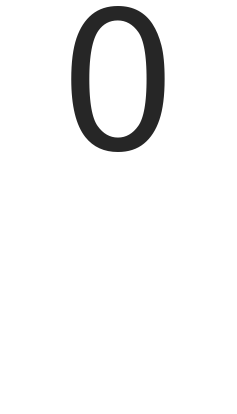

C:\Users\HP\Desktop\AlexNet_Coding\sample image\output_shape_number_16.jpg
17
size 2 (224, 224)


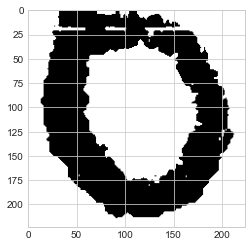

Image Preprocessing Complete~~~~~~~
Following is our prediction:
d= [6.22799779e-15 8.32042181e-29 0.00000000e+00 6.21454655e-21
 6.42651921e-18 1.10191785e-01 2.71787313e-24 1.48842408e-33
 9.86773552e-32 8.99020307e-08 8.17178858e-08 4.59042704e-03
 1.58701187e-06 1.95949175e-03 5.49443539e-05 1.37137854e-03
 7.10102977e-05 2.71072924e-01 5.73232319e-05 1.87782116e-05
 1.50054635e-08 4.43125464e-04 3.28382099e-04 1.78765296e-03
 5.56638952e-07 1.74059771e-08 6.22986081e-12 1.07763053e-05
 1.09422552e-04 2.14259489e-03 4.38681400e-06 2.78173129e-09
 4.37544742e-07 5.87860320e-08 2.26240991e-18 6.04822695e-01
 9.58304503e-04 1.78264497e-06]
j= 0.6048227


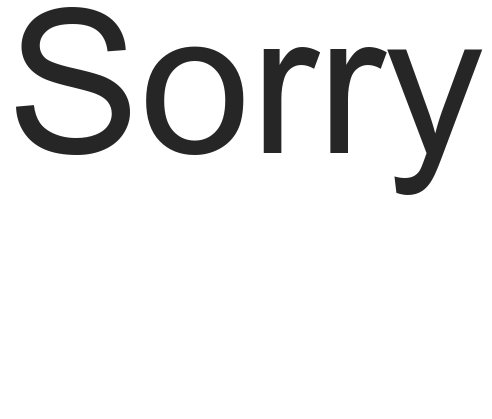

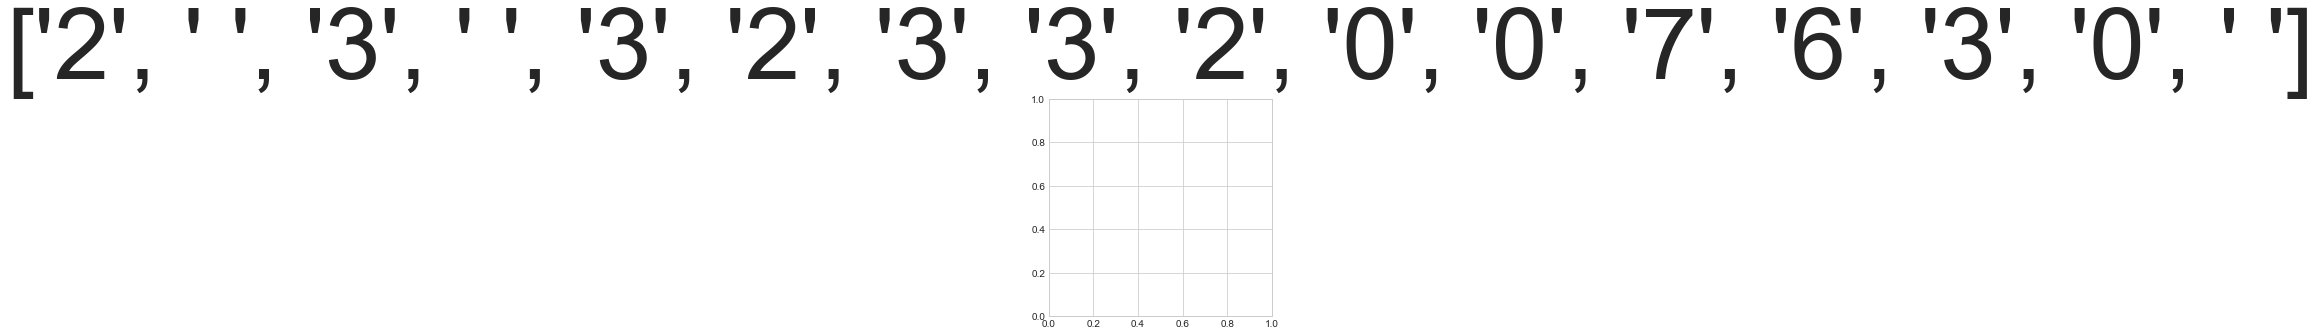

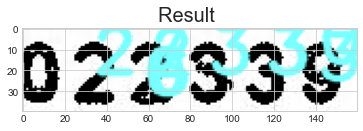

['2', ' ', '3', ' ', '3', '2', '3', '3', '2', '0', '0', '7', '6', '3', '0', ' ']
Please key in the digits on the images022339
[2, 2, 3, 3, 9]
16
16
16
[2, 0, 0, 0, 0]
[2, 2, 0, 0, 0]
[2, 2, 3, 0, 0]
[2, 2, 3, 3, 0]
accuracy for the predicted output and orginal image=80.0%
334/334 [==============================] - 47s 140ms/step - loss: 0.0697 - accuracy: 0.9806
loss= 6.9674961268901825
accuracy= 98.05999994277954
Option to recognise Digit
1. multiple digit
2. single digit
3. receipt with multiple digits
4. Automated recognition for simple & NON Stacked Digit scenario
5. Automated recognition for Stacked Digit cropped image scenario
6. Automated recognition for NON Stacked Digit cropped image scenario
7. Automated recognition for simple & Stacked Digit scenario
8. Automated recognition for Receipt (NON Stacked Digit)cropped image scenario
enter the option, n or N to exitn
thanks for exit


In [38]:
# import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

image_directory="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png\\Validation"
image_directory2="C:\\Users\\HP\\Desktop\\AlexNet_Coding\\dataset\\mnist_png\\Train"
y= os.listdir(image_directory)
x= os.listdir(image_directory2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


def test():
    truth=True


    while(truth):
            print("Option to recognise Digit")
            print("1. multiple digit")
            print("2. single digit")
            print("3. receipt with multiple digits")
            print("4. Automated recognition for simple & NON Stacked Digit scenario")
            print("5. Automated recognition for Stacked Digit cropped image scenario")
            print("6. Automated recognition for NON Stacked Digit cropped image scenario")
            print("7. Automated recognition for simple & Stacked Digit scenario")
            print("8. Automated recognition for Receipt (NON Stacked Digit)cropped image scenario")
            ipt=input("enter the option, n or N to exit")

            try:
                if(ipt=='n' or ipt=='N'):
                                print("thanks for exit")
                                truth=False

                elif(ipt=='1'):
                        #         path,folder=PathOCR()
                        #         image = cv2.imread(path)
                        #         cv2.imshow('Image', image)

                        #         plt.imshow(image)
                                prediction= multiImg()

                #                 recall_m(valid_set,prediction)
                #                 precision_m(valid_set,prediction)
                #                 f1_score(valid_set,prediction)
                                eva(y_test)


                elif(ipt=='2'):

                                prediction= singleImg()

                #                 recall_m(valid_set,prediction)
                #                 precision_m(valid_set,prediction)
                #                 f1_score(valid_set,prediction)
                                eva(y_test)

                elif(ipt=='3'):

                                prediction= receiptImg() 

                #                 recall_m(valid_set,prediction)
                #                 precision_m(valid_set,prediction)
                #                 f1_score(valid_set,prediction)
                                eva(y_test)

                elif(ipt=='4'):

                                path,folder=PathOCR()
                                prediction=denoiseBackNoCrop(path,folder,valid_set)
                                acc=eva(y_test)
    #                             acc(acc,prediction)


                elif(ipt=='5'):
                                path,folder=PathOCR()
                                address=cropForContour(path,folder)
                                prediction=denoiseBack(address,folder,valid_set)
                                eva(y_test)

                elif(ipt=='6'):
                                path,folder=PathOCR()
                                address=cropForContour(path,folder)
                                prediction=denoiseBackNoCrop(address,folder,valid_set)
                                eva(y_test)

                elif(ipt=='7'):
                                path,folder=PathOCR()
                                prediction=denoiseBack(path,folder,valid_set)
                                eva(y_test)

                elif(ipt=='8'):
                                path,folder=PathOCR()
                                address=cropForContour(path,folder)
                                prediction=denoiseBackReceipt(address,folder,valid_set)
                                eva(y_test)

                else:

                                print("please enter an valid option")
                                truth=True

            except:
                print("Some problem with the input not within the boundaries or the labels cannot be inserted, please re-enter")
                truth=True

        
# eva(prediction,y_test)
test()